<a href="https://colab.research.google.com/github/wsonguga/SensorAI/blob/main/tutorials/tutorial_dsp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Content

- Wave Generation
    - Sine Wave
    - Triangle Wave
    - Square Wave
    - Chirp Wave
    - Pulse Wave

- Noises
    - White Noise
    - Band-Limited White Noise
    - Impulsive Noise
    - Burst Noise
    - Brown Noise
    - Pink Noise
    - Flicker Noise
    - Powerline Noise
    - Resonance Noise

- Complex Wave Generation
    - SCG

- Filters
    - Butterworth Filters
    - Moving Average Filters
        - Simple
        - Exponential
    - Savgol Filter
    - Wiener Filter
    - Notch Filter
    - Matched Filter
    - Wavelet denoising
    - FFT denoising
    - Adaptive Filters
        - LMS
        - RLS
    - Kalman Filter
    - Averageing by Dynamic Time Warping

- Decompose:
    - Seasonal Decompose
    - EMD
    - EEMD
    - CEEMD
    - VMD
    - Blind source separation
        - PCA based
        - ICA based (including Fast ICA)

- Time Domain
  - Template of SCG
  - Analytic Signal and Hilbert Transform
  - Peak Detection
    - Peak of Peak Algorithm
  - Envelope Extraction
    - Envelope from Peaks
    - Average Envelope
    - Envelope and Phase Extraction using Hilbert Transform
  - Singular Spectrum Transform (SST)
  - Time Domain Feature
    - Petrosian Fractal Dimension (PFD)
    - Skewness and Kurtosis
- Frequency Domain
  - Fast Fourier Transform (FFT)
  - Frequency Domain Feature
    - Power Spectral Density (PSD)
    - Skewness and Kurtosis
- Time-Frequency Domain
  - Short Time Fourier Transform (STFT)
  - Wavelet Analysis
    - Mexican Hat Wavelet
    - Morlet Wavelet
    - Continuous Wavelet Transform (CWT)
    - Inverse CWT
  - Polynomial Chirplet Transform (PCT)
    - Chirplet Transform
    - Polynomial Chirplet Transform
  - Wigner Ville Distribution (WVD)
  - SynchroSqueezing Transform (SST)

**- Using Google Colab with Tutorial**

# Using Google Colab with Tutorial

If using Google Colab, run the following code prior to running any tutorial code.  If running code locally, ignore this section

In [ ]:
# This code clones the SensorAI github repository to colab
  # Note: rerunning this code segment will give an error if the repository currently exists in your colab
!git clone https://github.com/wsonguga/SensorAI.git

# Once this code is executed, click the file icon to the left to verify all files have been cloned

In [ ]:
# Set the root path to github repository
import os

root_path = "/content/SensorAI"

repo_root = os.path.join("/content/SensorAI")

!ls

In [ ]:
# Change to the tutorial repository
import os

os.chdir('SensorAI')

%ls             # display directory content

In [ ]:
# This command pulls any updated files from the repository
# This code segment may be re-executed at any point if there have been updates to the repository
!git pull https://github.com/wsonguga/SensorAI.git

In [ ]:
# INSTALL REQUIRED PACKAGES

!chmod +x install.sh  # Make the script executable
!./install.sh

# Wave Generation

In [ ]:
from lib.dsp import sine_wave
sine_ = sine_wave(duration=10, sampling_rate=100, amplitude=1.5, frequency=0.3, show=True)

## Triangle Wave

**References:**
1. https://en.wikipedia.org/wiki/Triangle_wave

</br>

A triangle wave, also known as a triangular wave, is a periodic waveform commonly encountered in signal processing, audio synthesis, and various other fields. It derives its name from its characteristic shape, which resembles a series of connected triangles due to its linear rise and fall over time.

A more general equation for a triangle wave, incorporating both amplitude $ a $ and period $ p $, can be expressed using the modulo operation and absolute value:

$$ y(t) = \frac{4a}{p} \cdot \left|
\left( \left( x - \frac{p}{4} \right) \bmod p \right)- \frac{p}{2}
\right| - a $$

In this equation:

- $ y(t) $ represents the amplitude of the triangle wave at time $ t $
- $ a $ denotes the amplitude of the wave, determining its peak-to-peak height.
- $ p $ is the period of the wave, defining the duration of one complete cycle.

In [ ]:
from lib.dsp import triangle_wave
triangle_ = triangle_wave(duration=10, sampling_rate=100, amplitude=1, frequency=0.5, show=True)


## Square Wave

**References:**
1. https://en.wikipedia.org/wiki/Square_wave

</br>

A square wave is a distinct, repetitive waveform characterized by its sharp, square-like shape. It is represented by the mathematical expression:
$$ y = A \, \text{sign}(\sin(\omega t + \phi)) $$

$A$ denotes the amplitude of the wave, $\omega$ represents the angular frequency, $t$ stands for time, and $\phi$ is the phase angle. The square wave alternates abruptly between two distinct amplitude levels, creating a waveform that resembles a sequence of square pulses.

</br>

In fact, a square wave can also be generated using the floor function directly:
$$ y = A \cdot \left( 2 \left( 2 \left\lfloor ft \right\rfloor - \left\lfloor 2ft \right\rfloor\right) + 1 \right)  $$
In this equation, $ \left\lfloor \cdot \right\rfloor $ denotes the floor function, which rounds down to the nearest integer.


In [ ]:
from lib.dsp import square_wave
square_ = square_wave(duration=10, sampling_rate=100, amplitude=1.5, frequency=.5, show=True)


## Chirp Wave

Chirp waves are waveforms whose frequency changes over time. Chirp waves are characterized by their continuous frequency sweep, which distinguishes them from other waveforms with fixed frequencies.

Here's a brief description of three common types of chirp waves:

1. **Linear Chirp Wave (Chirp_wave_linear):**
   A linear chirp wave is one in which the frequency increases or decreases linearly with time. It can be described mathematically as:

   $$ f(t) = f_0 + c t $$

   - $ f(t) $ represents the frequency of the chirp wave at time $ t $.
   - $ f_0 $ is the initial frequency of the chirp wave.
   - $ c $ is the chirp rate, indicating the rate of change of frequency with time.

2. **Hyperbolic Chirp Wave (Chirp_wave_hyperbolic):**
   A hyperbolic chirp wave is characterized by a frequency that changes according to a hyperbolic function. Its mathematical representation is:

   $$ f(t) = \frac{f_0 f_1 T}{\left(f_0 - f_1 \right) t + f_1 T} $$

   - $ f(t) $ represents the frequency of the chirp wave at time $ t $.
   - $ f_0 $ is the initial frequency of the chirp wave.
   - $ f_1 $ is the final frequency of the chirp wave.
   - $ T $ is the time it takes to sweep from $f_0$ to $f_1$

3. **Exponential Chirp Wave (Chirp_wave_exponential):**
   An exponential chirp wave exhibits frequency variation following an exponential function. Its mathematical form is:

   $$ f(t) = f_0 \cdot k^{ t } $$

   - $ f(t) $ represents the frequency of the chirp wave at time $ t $.
   - $ f_0 $ is the initial frequency of the chirp wave.
   - $ k $ is a parameter determining the rate of change of frequency over time.

These different types of chirp waves offer distinct frequency behaviors, making them suitable for various applications depending on the desired modulation characteristics and signal processing requirements. Linear chirps provide simple frequency sweep patterns, while hyperbolic and exponential chirps offer more complex frequency modulations suitable for specific signal processing tasks.

In [ ]:
from lib.dsp import chirp_wave_linear, chirp_wave_hyperbolic, chirp_wave_exponential

"""
The frequencies of the chirp_linear_ and the chirp_hyperbolic_ both range from 0.1 Hz to 2.6 Hz
The frequency of the chirp_exponential_ ranges from 0.1 Hz to (0.1 + 1.5^10) Hz (as the default value of duration is 10 seconds)
"""
chirp_linear_ = chirp_wave_linear(f0=0.1, c=0.25, show=True)
chirp_hyperbolic_ = chirp_wave_hyperbolic(f0=0.1, f1=2.6, show=True)
chirp_exponential_ = chirp_wave_exponential(f0=0.1, k=1.5, show=True)

## Pulses

A pulse in signal processing is a rapid, transient change in the amplitude of a signal from a baseline value to a higher or lower value, followed by a rapid return to the baseline value.[1]

</br>

**Reference 1:** *Ángela Molina, Joaquín González, Pulse Voltammetry in Physical Electrochemistry and Electroanalysis, Springer, 2015 ISBN 3319212516.*

In [ ]:
# Gaussian Pulse
from lib.dsp import gaussian_pulse

_ = gaussian_pulse(duration=100, sampling_rate=50, amplitude=1, frequency=2, bandwidth=0.6, show=True)

In [ ]:
# Impulse
from lib.dsp import impulse

_ = impulse(duration=100, amplitude=1, show=True)

In [ ]:
# Gaussian Pulse Wave
from lib.dsp import pulse_wave

"""
the parameter "expansion" means the number of sine waves used in the expansion for generating the pulse wave.
As the value of "expansion" increases, the pulse wave becomes closer to a square wave"
"""
pulse_3 = pulse_wave(duration=10, sampling_rate=100, amplitude=1, d=0.5, frequency=0.3, expansion=3, show=True)
pulse_10 = pulse_wave(duration=10, sampling_rate=100, amplitude=1, d=0.5, frequency=0.3, expansion=10, show=True)
pulse_25 = pulse_wave(duration=10, sampling_rate=100, amplitude=1, d=0.5, frequency=0.3, expansion=25, show=True)

In [ ]:
from lib.dsp import pulse_wave

"""
the parameter "d" means the radio between the pulse duration and the period.

Although using more harmonics will make the pulse wave closer to the shape of a square wave, oscillations will occur at the turning points of the square wave. These oscillations are called the "Gibbs phenomenon".
"""
pulse_25 = pulse_wave(duration=10, sampling_rate=100, amplitude=1, d=0.6, frequency=0.3, expansion=25, show=True)
pulse_25_ = pulse_wave(duration=10, sampling_rate=100, amplitude=1, d=0.3, frequency=0.3, expansion=25, show=True)

## Noise

In [ ]:
"""
Clean Data: SCG Signals (Seismocardiography)

SCG signals are a type of bio-signal that measures the vibrations of the chest wall caused by the beating heart.

Think of SCG signals as a way to "listen" to the heart's movements from outside the body. The signals captured can provide valuable information about the heart's activity. SCG signals are often analyzed to identify various parameters such as the timing of cardiac events (like systole and diastole).
"""
from lib.dsp import scg_simulate
import matplotlib.pyplot as plt

signal = scg_simulate()[:1000]

plt.figure(figsize=(8, 3))
plt.plot(signal)
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.title('Clean Signal')
plt.show()

### White Noise:
White noise is a random signal where all frequencies have equal power (flat power spectral density).  White noise $ W(t) $ has constant power spectral density: $ S_W(f) = \text{constant} $

</br>

Gaussian noise is a random signal where values follow a Gaussian (normal) distribution

</br>

Gaussian white noise is simply a noise signal that combines both the characteristics of white noise (flat power spectrum) and Gaussian noise (normal distribution).

</br>

Gaussian white noise and Laplacian white noise are two different types of random signals, and their main difference lies in their probability distribution functions.

</br>

1. **Gaussian White Noise:**
   - In the time domain, the sample values of Gaussian white noise are **independently and identically distributed, with amplitudes following a normal distribution**.
   - In the frequency domain, the power spectral density of Gaussian white noise is constant, meaning it has equal power at all frequencies.

2. **Laplacian White Noise:**
   - Unlike the normal distribution, because of the Laplace distribution, **extreme values are more likely to be observed in the noise**. This means that compared to Gaussian white noise, sudden and significant deviations from the mean are more likely to occur in Laplace white noise.
   - The power spectral density of Laplacian white noise is also constant in the frequency domain, meaning it has equal power at all frequencies.

</br>

In summary, although both types of white noise share some similarities (such as having a constant power spectral density in the frequency domain), their probability distribution functions differ, leading to some differences in signal properties and statistical characteristics.

In many cases, **directly adding random numbers can simulate the characteristics of white noise**, especially in digital signal processing and analog simulation. By directly adding random numbers, it is easy to generate random signals with similar statistical properties without the need for strict control of power density. This method is often more convenient in practice, especially for general purposes.

In [ ]:
from lib.dsp import add_white_noise, scg_simulate, my_stft, plot_psd

"""
When mode is 0, Gaussian white noise is added.
When mode is 1, Laplace white noise is added.

Compared with Gaussian White Noise, Laplacian White Noise is more likely to contain extreme values when their noise amplitudes are the same.
This phenomenon could be observed in below 2 figures.

The results of STFT and PSD will be shown, if you set show is equal to True.
"""

show = True

signal = scg_simulate()[:1000]

signal_with_Gaussian_white_noise = add_white_noise(signal, noise_amplitude=0.3, model=0, show=True)
if show:
    Gaussian_white_noise = signal_with_Gaussian_white_noise - signal
    _, _, _ = my_stft(Gaussian_white_noise, plot=True, fs=100)
    plot_psd(Gaussian_white_noise)


signal_with_Laplace_white_noise = add_white_noise(signal, noise_amplitude=0.3, model=1, show=True)
if show:
    Laplace_white_noise = signal_with_Laplace_white_noise - signal
    _, _, _ = my_stft(Laplace_white_noise, plot=True, fs=100)
    plot_psd(Laplace_white_noise)

### Band-Limited White Noise:

 Band-limited white noise $ B(t) $ is confined to a frequency range $[f_1, f_2]$: $ S_B(f) = \begin{cases} \text{constant}, & \text{if } f_1 \leq |f| \leq f_2 \\ 0, & \text{otherwise} \end{cases} $

In [ ]:
from lib.dsp import add_band_limited_white_noise, scg_simulate, my_stft


signal = scg_simulate()[:1000]

"""
In this example, the frequency of band-limited white noise is set ranging from 1Hz to 5Hz.
The results of STFT and PSD will be shown, if you set show is equal to True.
"""
show = True

signal_with_band_limited_white_noise = add_band_limited_white_noise(signal, noise_amplitude=1, lowcut=1, highcut=5, show=True)
if show:
    band_limited_white_noise = signal_with_band_limited_white_noise - signal
    _, _, _ = my_stft(band_limited_white_noise, plot=True, fs=100)
    plot_psd(band_limited_white_noise)

### Impulsive Noise

Impulsive noise is like sudden bursts of random interference or disturbances in a signal. Picture it as unexpected spikes or jumps that disrupt the normal flow of a signal. These disturbances are usually short-lived but can be strong enough to affect the quality of the signal. Impulsive noise can come from various sources like electrical interference, equipment malfunction, or even natural phenomena like lightning strikes.

Impulsive noise $ I(t) $ is characterized by Dirac delta functions: $$ I(t) = \sum_{n} A_n \delta(t - t_n) $$

In [ ]:
from lib.dsp import add_impulsive_noise, scg_simulate, my_stft, plot_psd
signal = scg_simulate()[:1000]

"""
The Variable "number" can control the number of spikes generated in the Impulsive Noise.
The Variable "rate" can control the ratio of spike numbers generated in the Impulsive Noise to the total signal length.
"""
show = True

signal_with_impulsive_noise = add_impulsive_noise(signal, noise_amplitude=1.5, number=50, show=True)
# signal_with_impulsive_noise = add_impulsive_noise(signal, noise_amplitude=1.5, rate=0.05, show=True)
if show:
    impulsive_noise = signal_with_impulsive_noise - signal
    _, _, _ = my_stft(impulsive_noise, plot=True, fs=100)
    plot_psd(impulsive_noise)

### Burst Noise:
Burst noise, also known as popcorn noise, is a type of noise characterized by sudden and intermittent bursts or groups of spikes in a signal. These bursts can
occur randomly or periodically and typically last for a short duration. Burst noise can be caused by various factors such as fluctuations in voltage or current electronic component defects, or electromagnetic interference.

Burst noise $ B(t) $ is modeled as a sum of pulses: $ B(t) = \sum_{n} A_n \text{sinc}(\omega t - \phi_n) $

In [ ]:
from lib.dsp import add_burst_noise, scg_simulate, my_stft, plot_psd
signal = scg_simulate()[:1000]
"""
The Variable burst_num_max can control the max number of bursts or groups of spikes.
"""
show = True

signal_with_burst_noise = add_burst_noise(signal, burst_num_max=4, noise_amplitude=0.6, show=True)
if show:
    burst_noise = signal_with_burst_noise - signal
    _, _, _ = my_stft(burst_noise, plot=True, fs=100)
    plot_psd(burst_noise)

### Colored Noise:
Brown noise, pink noise, and blue noise are all types of random signals with different frequency distributions.

1. **Brown Noise**:
   - Brown noise, also known as Brownian noise or red noise, has a power spectral density inversely proportional to the square of the frequency.
   - Mathematically, its power spectral density $ S(f) $ can be represented as:
     **$ S(f) \propto \frac{1}{f^2} $**

2. **Pink Noise**:
   - Pink noise has equal power in each octave, meaning it has a consistent power per frequency interval.
   - Mathematically, its power spectral density $ S(f) $ decreases by 3 decibels (dB) per octave.
   - It can be represented as: **$ S(f) \propto \frac{1}{f} $**

3. **Blue Noise**:
   - Blue noise, also known as azure noise, has a power spectral density directly proportional to the frequency.
   - Mathematically, its power spectral density $ S(f) $ can be represented as:
     **$ S(f) \propto f $**


In [ ]:
from lib.dsp import add_colored_noise, scg_simulate
import matplotlib.pyplot as plt
from scipy.signal import welch

signal = scg_simulate()[:1000]

show = True

signal_with_blue_noise = add_colored_noise(signal, model='blue', show=True)
if show:
    blue_noise = signal_with_blue_noise - signal
    _, _, _ = my_stft(blue_noise, plot=True, fs=100)
    plot_psd(blue_noise)

signal_with_pink_noise = add_colored_noise(signal, model='pink', show=True)
if show:
    pink_noise = signal_with_pink_noise - signal
    _, _, _ = my_stft(pink_noise, plot=True, fs=100)
    plot_psd(pink_noise)

signal_with_brown_noise = add_colored_noise(signal, model='brown', show=True)
if show:
    brown_noise = signal_with_brown_noise - signal
    _, _, _ = my_stft(brown_noise, plot=True, fs=100)
    plot_psd(brown_noise)

fs = 100
frequencies_blue, psd_blue = welch(signal_with_blue_noise-signal, fs=fs)
frequencies_pink, psd_pink = welch(signal_with_pink_noise-signal, fs=fs)
frequencies_brown, psd_brown = welch(signal_with_brown_noise-signal, fs=fs)

plt.figure(figsize=(8, 3))
plt.semilogy(frequencies_blue, psd_blue, label='Blue')
plt.semilogy(frequencies_pink, psd_pink, label='Pink')
plt.semilogy(frequencies_brown, psd_brown, label='Brown')
plt.xlabel('Frequency (Hz)');plt.ylabel('PSD (V^2/Hz)');plt.title('Power Spectral Density (PSD)')
plt.grid(True);plt.legend();plt.show()

### Flicker Noise:
https://en.wikipedia.org/wiki/Flicker_noise

Flicker noise $ F(t) $ exhibits a power spectral density proportional to $ \frac{1}{f} $: $ S_F(f) \propto \frac{1}{f} $. And Flicker noise is also known as pink noise!

In [ ]:
from lib.dsp import add_flicker_noise, scg_simulate, my_stft, plot_psd

show = True

signal = scg_simulate()[:1000]
signal_with_flicker_noise = add_flicker_noise(signal, show=True)

if show:
    flicker_noise = signal_with_flicker_noise - signal
    _, _, _ = my_stft(flicker_noise, plot=True, fs=100)
    plot_psd(flicker_noise)

### Powerline Noise:
Powerline noise, also known as electrical line noise, refers to unwanted electrical interference that occurs in power lines. It typically manifests as a humming or buzzing sound in audio equipment or as interference in electronic signals. Powerline noise is caused by various factors such as electromagnetic interference (EMI) from nearby electrical devices,or fluctuations in the power grid. It can affect the performance of audio systems, communication devices, and other electronic equipment by introducing unwanted signals or disturbances. Filtering and shielding techniques are often used to mitigate powerline noise in electronic systems.

Powerline noise $ P(t) $ interferes with signals, often sinusoidal: $ P(t) = A \sin(2\pi f_{\text{power}} t) $


In [ ]:
from lib.dsp import add_powerline_noise, scg_simulate, my_stft, plot_psd

show = True

signal = scg_simulate(sampling_rate=1000)[:10000]
signal_with_power_line = add_powerline_noise(signal,sampling_rate=1000, duration=10, powerline_amplitude=0.3, show=True)
if show:
    power_line = signal_with_power_line - signal
    _, _, _ = my_stft(power_line , plot=True, fs=1000)
    plot_psd(power_line )

### Echo Noise:

reference： adsp

Multipath and echo are distortions arising from signal reflections at points where the medium's properties change. Both acoustic and electromagnetic signals can experience these phenomena.

Echo occurs when a portion of the signal reflects back to the source. Acoustic echoes result from feedback between speakers and microphones. Addressing echo cancellation remains crucial in modern communication systems.

Multipath signifies that the transmitted signal reaches the destination after reflecting off various points or surfaces through different paths. In room acoustics, multipath propagation causes sound reverberation. In cellular mobile communication, unmodeled multipath propagation can distort signals significantly.

In [ ]:
from lib.dsp import add_echo_noise, scg_simulate, my_stft, plot_psd
signal = scg_simulate()[:1000]

show=True

attenuation_factor = [0.8, 0.6, 0.4]
delay_factor = [10, 25, 40]
noisy_signal = add_echo_noise(signal, 3, attenuation_factor, delay_factor, show=True)
if show:
    echo_noise = noisy_signal - signal
    _, _, _ = my_stft(echo_noise , plot=True, fs=100)
    plot_psd(echo_noise)

## Complex Wave Generation

### SCG generation
A function to generate different types of synthetic scg signal. We can specify different params to change the pulse type, noise type, range of systolic and diastolic and so on. Use "help(dsp.scg_simulate)" to get the information of the params.

In [ ]:
import lib.dsp
print(help(lib.dsp.scg_simulate))

#### pulse_type
First, we illustrate the parameter of "pulse_type". It determines which wavelet to use to form the basic waveform of a scg cycle. Now we can choose "db", "mor", "sym" and "ricker". The pulse_type choices will be added gradually in the future.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import lib.dsp

signal_db = lib.dsp.scg_simulate(
    num_rows=1,
    duration=10,
    sampling_rate=100,
    pulse_type="db",
    # set the parameters below to make sure the other parameters are the same
    heart_rate=(70,71),
    respiratory_rate=(15,16),
    systolic=(120,121),
    diastolic=(90,91)
)

signal_mor = lib.dsp.scg_simulate(
    num_rows=1,
    duration=10,
    sampling_rate=100,
    pulse_type="mor",
    heart_rate=(70,71),
    respiratory_rate=(15,16),
    systolic=(120,121),
    diastolic=(90,91)
)

plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.plot(signal_db[:1000])
plt.title("SCG generated by daubechies wavelet")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.subplot(2,1,2)
plt.plot(signal_mor[:1000])
plt.title("SCG generated by morlet wavelet")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

#### add_respiratory
The parameter control whether add respiratory. If True, we can also specify the range of the respiratory rate.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import lib.dsp

signal_with_respiratory = lib.dsp.scg_simulate(
    num_rows=1,
    duration=10,
    sampling_rate=100,
    pulse_type="db",
    heart_rate=(70,71),
    add_respiratory=True,
    systolic=(120,121),
    diastolic=(90,91)
)

signal_without_respiratory = lib.dsp.scg_simulate(
    num_rows=1,
    duration=10,
    sampling_rate=100,
    pulse_type="db",
    heart_rate=(70,71),
    add_respiratory = False,
    systolic=(120,121),
    diastolic=(90,91)
)

plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.plot(signal_without_respiratory[:1000])
plt.title("SCG without respiratory")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.subplot(2,1,2)
plt.plot(signal_with_respiratory[:1000])
plt.title("SCG with respiratory")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

#### systolic/diastolic/heart_rate

These parameters control the shape of the scg. Here, for the convenience, we only illustrate the systolic which control the length of gap between peaks. It is obvious that in one cycle, the gap between high peak and low peak is smaller with bigger systolic.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import lib.dsp

signal_90 = lib.dsp.scg_simulate(
    num_rows=1,
    duration=10,
    sampling_rate=100,
    pulse_type="db",
    heart_rate=(70,71),
    respiratory_rate=(15,16),
    systolic=(90,91),
    diastolic=(90,91)
)

signal_170 = lib.dsp.scg_simulate(
    num_rows=1,
    duration=10,
    sampling_rate=100,
    pulse_type="db",
    heart_rate=(70,71),
    respiratory_rate=(15,16),
    systolic=(170,171),
    diastolic=(90,91)
)

plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.plot(signal_90[:1000])
plt.title("SCG with 90 systolic")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.subplot(2,1,2)
plt.plot(signal_170[:1000])
plt.title("SCG with 170 systolic")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

# Filters

## **Butterworth Filters**

   The Butterworth filter is a popular linear filter designed to pass signals within a specified frequency range while attenuating frequencies outside that range. It is characterized by **a smooth frequency response** and is commonly used in signal processing and communications. Mathematically, the filter transfer function is given by $H(s) = \frac{1}{1 + (\frac{s}{\omega_c})^{2n}}$ where $s$ is the complex frequency variable, $\omega_c$ is the cutoff frequency, and $n$ is the filter order.


The "order" parameter in a Butterworth filter specifies the filter's degree. It determines the filter's frequency response characteristics, affecting its cutoff frequency and slope. Higher orders result in steeper cutoffs, effectively filtering out frequencies beyond the desired range. Lower orders have wider transition regions but lower phase distortion. The choice of order balances filter performance and computational complexity based on specific application requirements.

**FEATURES:**

**Maximally Flat Frequency Response:**

* The Butterworth filter is characterized by a frequency response that is as flat as possible in the passband (the range of frequencies that are allowed to pass through the filter) and then rolls off gradually in the stopband (the range of frequencies that are attenuated).

* Unlike other filters (like Chebyshev or elliptic filters), it doesn’t have ripples in the passband.

**Roll-Off:**

* While the Butterworth filter provides a flat passband, its transition from the passband to the stopband is smooth. The cutoff frequency is the point at which the filter begins to attenuate frequencies.

* The roll-off is not as steep as other filters like Chebyshev, but it is smooth and gradual. The rate of roll-off depends on the order of the filter. A higher-order Butterworth filter has a steeper roll-off.

**Phase Response:**

* The Butterworth filter also has a relatively linear phase response, which means that the phase shift introduced by the filter does not distort the signal too much.

**Filter Types:**

* The Butterworth filter can be implemented as low-pass, high-pass, band-pass, or band-stop filters. The choice of filter type depends on the application and the frequencies you want to pass or reject.

**Order of the Filter:**

* The order of the Butterworth filter determines how sharp the transition is between the passband and the stopband. A higher-order filter results in a sharper transition but can also be more complex to implement.

* The filter's behavior is defined by the following:

    * **First-order filter:** Has a roll-off of 20 dB per decade.
    * **Second-order filter:** Has a roll-off of 40 dB per decade.
    * **Nth-order filter:** Has a roll-off of 20 * N dB per decade.

**Pros:**

* **Flat Passband:** The Butterworth filter has no ripples in the passband, which makes it ideal when preserving the signal in the passband is critical.

* **Simple Design:** It has a straightforward design and is easy to implement in both analog and digital domains.

* **Well-Behaved Roll-Off:** The filter's roll-off is smooth, avoiding sudden changes in the signal's frequency response.

**Cons:**

* **Gradual Roll-Off:** The Butterworth filter's roll-off is not as steep as that of other filters like Chebyshev or elliptic filters, meaning that the stopband may not be completely attenuated as quickly.

* **Higher Order Filters:** To achieve a sharper roll-off, higher-order filters are required, which increases the complexity and can introduce more delay or distortion.

In [ ]:
from lib.dsp import butter_highpass_filter, scg_simulate, my_stft, add_distort_noise
signal = scg_simulate()[:1000]

"""
Add low-frequency noise (below 3Hz) to the signal. Then apply a Butterworth high-pass filter to the remove signals below 5Hz. The output of the STFT indicates few energy in the signal below 5Hz.
"""
# signal_with_3Hz_Noise, Add noise with a frequency of 3 to the signal. The amplitude of the noise is noise_amplitude * np.std(signal).

show = True
signal_with_3Hz_Noise = add_distort_noise(signal, n_samples=1000, sampling_rate=100,noise_frequency=3,  noise_amplitude=0.5, show=True)
filtered_signal_1 = butter_highpass_filter(signal_with_3Hz_Noise, cutoff=5, order=10, show=True)
if show:
    "show the comparison of Noisy Signal and Filtered Signal"
    _, _, _ = my_stft(signal_with_3Hz_Noise, plot=True, fs=100)
    _, _, _ = my_stft(filtered_signal_1, plot=True, fs=100)

# Plot the effectiveness of the results
plt.figure(figsize=(10, 6))
t = np.linspace(0, 1000, len(signal))

# Plot original signal
plt.plot(t, signal_with_3Hz_Noise, label="Noisy Signal", color='red', alpha=0.6)

# Plot the smoothed signal
plt.plot(t, filtered_signal_1, label=f"Filtered Signal", color='blue', linewidth=2)

# Plot the true signal
plt.plot(t, signal, label="True Signal", color='green', linestyle='--', alpha=0.8)

# Labels and legend
plt.title("Effectiveness of Simple Moving Average Filter")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()

plt.grid(True)
plt.show()

In [ ]:
from lib.dsp import butter_lowpass_filter, scg_simulate, my_stft, sine_wave
signal = scg_simulate()[:1000]
"""
Add high-frequency sine wave (45Hz) to the signal. Then apply a Butterworth low-pass filter to the remove signals above 42.5Hz. The output of the STFT indicates few energy in the signal above 42.5Hz. However, there are still some residual components remaining.
"""
show = True

signal_with_45Hz_sine_noise = signal+sine_wave(frequency=45, amplitude=0.8e-6, show=False)
filtered_signal_2 = butter_lowpass_filter(signal_with_45Hz_sine_noise, cutoff=42.5, show=True)

if show:
    "show the comparison of Noisy Signal and Filtered Signal"
    _, _, _ = my_stft(signal_with_45Hz_sine_noise, plot=True, fs=100)
    _, _, _ = my_stft(filtered_signal_2, plot=True, fs=100)


# Plot the effectiveness of the results
plt.figure(figsize=(10, 6))
t = np.linspace(0, 1000, len(signal))

# Plot original signal
plt.plot(t, signal_with_45Hz_sine_noise, label="Noisy Signal", color='red', alpha=0.6)

# Plot the smoothed signal
plt.plot(t, filtered_signal_2, label=f"Filtered Signal", color='blue', linewidth=2)

# Plot the true signal
plt.plot(t, signal, label="True Signal", color='green', linestyle='--', alpha=0.8)

# Labels and legend
plt.title("Effectiveness of Simple Moving Average Filter")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()

plt.grid(True)
plt.show()

In [ ]:
from lib.dsp import butter_bandpass_filter, scg_simulate, my_stft
signal = scg_simulate()[:1000]
"""
Add a high-frequency sine wave (45Hz) and a low-frequency sine wave (3Hz) to the signal. Then apply a Butterworth bandpass filter to the remove signals above 42.5Hz and below 5Hz. The output of the STFT indicates most of energy in the signal in the range of 5Hz to 42.5Hz.
"""
show = True
signal_with_3Hz_and_45Hz_sine_noise = signal+sine_wave(frequency=45, amplitude=0.8e-6, show=False)+sine_wave(frequency=3, amplitude=1e-6, show=False)
filtered_signal_3 = butter_bandpass_filter(signal_with_3Hz_and_45Hz_sine_noise, lowcut=5, highcut=42.5, order=10, show=True)
if show:
    "show the comparison of Noisy Signal and Filtered Signal"
    _, _, _ = my_stft(signal_with_3Hz_and_45Hz_sine_noise, plot=True, fs=100)
    _, _, _ = my_stft(filtered_signal_3, plot=True, fs=100)


# Plot the effectiveness of the results
plt.figure(figsize=(10, 6))
t = np.linspace(0, 1000, len(signal))

# Plot original signal
plt.plot(t, signal_with_3Hz_and_45Hz_sine_noise, label="Noisy Signal", color='red', alpha=0.6)

# Plot the smoothed signal
plt.plot(t, filtered_signal_3, label=f"Filtered Signal", color='blue', linewidth=2)

# Plot the true signal
plt.plot(t, signal, label="True Signal", color='green', linestyle='--', alpha=0.8)

# Labels and legend
plt.title("Effectiveness of Simple Moving Average Filter")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()

plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from lib.dsp import butter_bandstop_filter, sine_wave, scg_simulate, my_stft
signal = scg_simulate()[:1000]
"""
Add a 10Hz sine wave to the signal. Then apply a Butterworth band-stop filter to the remove signals in the range of 9Hz to 11Hz. The output of the STFT indicates few energy in the signal in the range of 9Hz to 11Hz.
"""
show=True
sine_noise = sine_wave(frequency=10, amplitude=0.8e-6, show=False)
signal_with_10Hz_sine_noise = signal + sine_noise
plt.figure(figsize=(8,3))
plt.plot(signal_with_10Hz_sine_noise)
plt.title('Signal with 10Hz Sine Noise');plt.show()
filtered_signal_4 = butter_bandstop_filter(signal_with_10Hz_sine_noise, lowcut=9, highcut=11, show=True)

if show:
    "show the comparison of Noisy Signal and Filtered Signal"
    _, _, _ = my_stft(signal_with_10Hz_sine_noise, plot=True, fs=100)
    _, _, _ = my_stft(filtered_signal_4, plot=True, fs=100)

# Plot the effectiveness of the results
plt.figure(figsize=(10, 6))
t = np.linspace(0, 1000, len(signal))

# Plot original signal
plt.plot(t, signal_with_10Hz_sine_noise, label="Noisy Signal", color='red', alpha=0.6)

# Plot the smoothed signal
plt.plot(t, filtered_signal_4, label=f"Filtered Signal", color='blue', linewidth=2)

# Plot the true signal
plt.plot(t, signal, label="True Signal", color='green', linestyle='--', alpha=0.8)

# Labels and legend
plt.title("Effectiveness of Simple Moving Average Filter")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()

plt.grid(True)
plt.show()

## Moving Average Filters

A moving average filter is a simple and widely used signal processing technique that smooths out fluctuations or noise in data by averaging a sliding window of values from the input data over time. It's commonly used in time series data, such as stock prices, sensor readings, or audio signals, to help highlight trends or patterns by reducing short-term variations.

</br>

**Steps:**


1. **Define window size:** This is the number of consecutive data points considered at a time. For example, in a moving average with a window size of 3, each value in the output is the average of the previous three data points from the input.

2. **Slide the window across the data:** For each point in the data, the window shifts one position forward, and a new average is calculated for the new set of data points within the window.

3. **Output:** The result is a smoother version of the input data, where the short-term fluctuations are reduced.

</br>

**Types:**

</br>

* **Simple Moving Average (SMA):** Each data point in the window is given equal weight.

* **Weighted Moving Average (WMA):** More recent data points are given higher weight than older ones.

* **Exponential Moving Average (EMA):** The weight decreases exponentially with time, giving more importance to recent data points.  It is a special case of the WMA.

</br>

The moving average filter is widely used for data smoothing, noise reduction, and trend identification in fields like finance, engineering, and signal processing.

**Pros:**

1. **Simplicity:** Moving average filters are easy to implement and understand. They involve simple arithmetic (averaging) and are computationally inexpensive.

2. **Noise Reduction:** These filters are effective at removing random noise, especially in cases where the noise is high-frequency, making the signal smoother.

3. **Stability:** They are stable and do not introduce any complex artifacts. The output is typically smooth, which is useful for many applications like signal filtering or trend analysis.

4. **Effective for Low-Frequency Signals:** Moving averages are well-suited to data that exhibits low-frequency variations or trends, as they preserve the signal while removing rapid fluctuations.

5. **Widely Used:** They are commonly used in various fields such as stock market analysis (e.g., moving average of stock prices), sensor data smoothing, and image processing (e.g., blurring).

</br>

**Cons:**

1. **Delay/Phase Shift:** Moving average filters introduce a delay in the signal, especially for long window sizes. This is problematic for real-time systems or time-sensitive applications. The output may lag behind the actual data.

2. **Loss of High-Frequency Information:** These filters can attenuate high-frequency signals or rapid changes in data, which may be undesirable in applications that require preserving sharp transitions (e.g., edge detection in images).

3. **Window Size Sensitivity:** The performance of a moving average filter heavily depends on the window size. A too-small window might not filter enough noise, while a too-large window may overly smooth the signal, losing important details.

4. **Edge Effects:** For data at the boundaries (e.g., the start or end of a time series or image), moving averages may produce unreliable results because the filter may not have enough data points on one side of the window.

5. **Not Ideal for Non-Stationary Data:** Moving average filters are better suited for stationary or slow-varying signals. They may not perform well with non-stationary signals (i.e., signals that have trends or abrupt changes).

6. **Over-Smoothing:** In some cases, particularly with larger window sizes, the filter can over-smooth the signal, removing important variations or trends in the data.

### **Simple Moving Average (SMA) Filter:**
   The SMA filter is a basic time-domain filter that computes the average of a specified number of consecutive data points. It provides a simple means of smoothing a time series to reveal underlying trends. Mathematically, the SMA for a window size $N$ is given by $y(t) = \frac{1}{N} \sum_{i=1}^{N} x(t-i+1)$. Essentially, the SMA filter is a type of **low-pass filter**.

In [ ]:
from lib.dsp import simple_moving_average_filter, add_distort_noise, my_stft, sine_wave
"""
Regarding the moving averaging filter, the most important parameter is "len", which determines the length of the signal over which the average it taken.
A larger "len" results in better smoothing effects. By setting "show" to True and observe the STFT plot output, it's noticeable that "filtered_signal_5_5" still contains considerable high-frequency components, while "filtered_signal_5_20" has almost no high-frequency energy.
"""
show=True
signal = sine_wave(duration=10, sampling_rate=100, frequency=0.5)
signal_with_40Hz_Noise = add_distort_noise(signal, n_samples=1000, sampling_rate=100,noise_frequency=40,  noise_amplitude=0.3, show=True)

filtered_signal_5_5 = simple_moving_average_filter(signal_with_40Hz_Noise, length=5, show=True)
if show:
    _, _, _ = my_stft(filtered_signal_5_5, plot=True, fs=100)

filtered_signal_5_25 = simple_moving_average_filter(signal_with_40Hz_Noise, length=25, show=True)
if show:
    _, _, _ = my_stft(filtered_signal_5_25, plot=True, fs=100)


# Plot the effectiveness of the results
plt.figure(figsize=(10, 6))
t = np.linspace(0, 1000, len(signal))

# Plot original signal
plt.plot(t, signal_with_40Hz_Noise, label="Noisy Signal", color='red', alpha=0.6)

# Plot the smoothed signal with Window Size 5
plt.plot(t, filtered_signal_5_5, label=f"Smoothed Signal (Window size={5})", color='purple', linewidth=2)

# Plot the smoothed signal with Window Size 25
plt.plot(t, filtered_signal_5_25, label=f"Smoothed Signal (Window size={25})", color='blue', linewidth=2)

# Plot the true signal
plt.plot(t, signal, label="True Signal", color='green', linestyle='--', alpha=0.8)

# Labels and legend
plt.title("Effectiveness of Filter")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()

plt.grid(True)
plt.show()


### **Exponential Moving Average (EMA) Filter:**
   The EMA filter assigns exponentially decreasing weights to past data points, **giving more importance to recent observations**. It is widely used for trend analysis and noise reduction. Mathematically, the EMA is defined by $y(t) = \alpha x(t) + (1-\alpha)y(t-1)$, where $\alpha$ is the smoothing factor. Essentially, the EMA filter is a type of **low-pass filter** too.

In [ ]:
from lib.dsp import exponential_moving_average_filter, add_distort_noise, my_stft, sine_wave
"""
The "alpha" parameter in an Exponential Moving Average (EMA) filter controls the weighting of each data point, determining how much emphasis is placed on recent data versus past data. A smaller alpha results in faster decay and higher emphasis on recent data, while a larger alpha leads to slower decay and more emphasis on past data.
"""
show=True
signal = sine_wave(duration=10, sampling_rate=100, frequency=0.5)

signal_with_40Hz_Noise = add_distort_noise(signal, n_samples=1000, sampling_rate=100,noise_frequency=40,  noise_amplitude=0.3, show=True)

filtered_signal_6 = exponential_moving_average_filter(signal_with_40Hz_Noise, length=25, alpha=0.2, show=True)
if show:
    _, _, _ = my_stft(filtered_signal_6, plot=True, fs=100)

filtered_signal_6_ = exponential_moving_average_filter(signal_with_40Hz_Noise, length=25, alpha=0.8, show=True)
if show:
    _, _, _ = my_stft(filtered_signal_6_, plot=True, fs=100)


# Plot the effectiveness of the results
plt.figure(figsize=(10, 6))
t = np.linspace(0, 1000, len(signal))

# Plot original signal
plt.plot(t, signal_with_40Hz_Noise, label="Noisy Signal", color='red', alpha=0.6)

# Plot the smoothed signal with Window Size 5
plt.plot(t, filtered_signal_6, label=f"Smoothed Signal (Window size={5})", color='purple', linewidth=2)

# Plot the smoothed signal with Window Size 25
plt.plot(t, filtered_signal_6_, label=f"Smoothed Signal (Window size={25})", color='blue', linewidth=2)

# Plot the true signal
plt.plot(t, signal, label="True Signal", color='green', linestyle='--', alpha=0.8)

# Labels and legend
plt.title("Effectiveness of Filter")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()

plt.grid(True)
plt.show()

## Advanced Filter


### 1. **Savitzky-Golay Filter (savgol_filter):**
   The Savitzky-Golay filter is a smoothing algorithm that preserves important features of a signal while reducing noise. It employs polynomial fitting within a sliding window to smooth the data.

   </br>

   It's particularly useful in signal processing and data analysis to reduce noise while retaining the shape and characteristics of the original data. The Savitzky-Golay filter is a type of polynomial smoothing filter, and it works by fitting successive polynomials to the data.
   
   </br>
   
   Mathematically, the filter coefficients are determined by least squares fitting, providing a balance between noise reduction and signal preservation.

   </br>
   
   $Minimize \text{ } \sum_{i=-m}^{m} (y_{k+i} - \sum_{j=0}^{p} a_j x_{k+i}^2)^2$

   </br>

  The Savitzky-Golay filter smooths a set of data points by fitting a polynomial of degree ***k*** to a window of ***2m+1*** data points (where ***m*** is half the window size). The polynomial coefficients are calculated through least squares fitting, and the output at each point is the value of the polynomial at the center of the window.

  </br>

  **Example:**

  If polynomial is $y=a_0+a_1x+a_2x^2$

  then $Minimize \text{ } \sum_{i=-2}^2 (y_{k+i}-(a_0+a_1x_{k+i}+a_2x_{k+i}^2))^2$

  <br> <br> **Reference:** https://medium.com/pythoneers/introduction-to-the-savitzky-golay-filter-a-comprehensive-guide-using-python-b2dd07a8e2ce


**Features:**

</br>

* **Polynomial Fitting:** The Savitzky-Golay filter fits a polynomial of a specified degree to a sliding window of data points. This helps smooth the data while keeping the underlying trend intact.

* **Window Size:** The filter operates on a window of data points, and the window size (usually an odd number) determines how much data the filter uses to fit the polynomial.

* **Preserves Features**: Unlike a simple moving average filter that can distort peaks and valleys, the Savitzky-Golay filter preserves these features better, especially with higher-degree polynomials.

* **Differentiation:** The Savitzky-Golay filter can also be used for differentiating data (i.e., calculating derivatives), making it useful in many applications like spectroscopy, where you might want to find the rate of change of a signal.

**Steps:**

</br>

1. **Window:** The data is divided into overlapping windows, and in each window, a polynomial is fitted to the data points.

2. **Polynomial Fitting:** The polynomial is fitted using least squares to minimize the error between the polynomial and the data points in that window.

3. **Smoothing:** The smoothed value for each data point is the value of the fitted polynomial at the center of the window.

**Pros:**

* **Preserves Peaks and Valleys:** Unlike moving averages, it does not distort sharp features like peaks, valleys, or edges.

* **Works for Differentiation:** Can be used for derivative calculations, making it useful for identifying slopes or rates of change in data.

* **Flexibility:** The window size and polynomial degree can be adjusted to balance smoothing and feature preservation.

**Cons:**

* **Edge Effects:** Like other filters, Savitzky-Golay can produce unreliable results at the boundaries of the data (near the edges).

* **Computational Cost:** It can be more computationally intensive than simpler filters like moving averages, especially for large datasets.

In [ ]:
from lib.dsp import savgol_filter, scg_simulate, add_distort_noise, my_stft
import matplotlib.pyplot as plt

signal = scg_simulate()[:1000]

# =========== Usage 1 ===========
"""
It's nice for us to use savgol filter to get rid of low-frequency noise.
We can use a savgol filter whose window size is 16 to get the low frequency noise.
A larger window size results in larger smoothing effects.
"""

show=True
signal_with_5Hz_noise = add_distort_noise(signal, n_samples=1000, sampling_rate=100,noise_frequency=5,  noise_amplitude=0.8, show=True)

filtered_signal_7 = savgol_filter(signal_with_5Hz_noise, window_length=15, show=False)
if show:
    _, _, _ = my_stft(signal_with_5Hz_noise, plot=True, fs=100)
    _, _, _ = my_stft(filtered_signal_7, plot=True, fs=100)

# filtered signal  = noisy signal - output of savgol filter
_, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,6))

axes[0].plot(signal_with_5Hz_noise, label='noisy Signal')
axes[0].plot(filtered_signal_7, label='filtered signal')
axes[1].plot(signal_with_5Hz_noise, label='noisy signal')
axes[1].plot(signal_with_5Hz_noise - filtered_signal_7, label='detrended signal')
plt.tight_layout()
plt.legend()
plt.show()


# Plot the effectiveness of the results
plt.figure(figsize=(10, 6))
t = np.linspace(0, 1000, len(signal))

# Plot original signal
plt.plot(t, signal_with_5Hz_noise, label="Noisy Signal", color='red', alpha=0.6)

# Plot the smoothed signal
plt.plot(t, filtered_signal_7, label=f"Smoothed Signal (Window size={15})", color='blue', linewidth=2)

# Plot the true signal
plt.plot(t, signal, label="True Signal", color='green', linestyle='--', alpha=0.8)

# Labels and legend
plt.title("Effectiveness of Simple Moving Average Filter")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()

plt.grid(True)
plt.show()

In [ ]:
from lib.dsp import savgol_filter, sine_wave, add_distort_noise
import numpy as np
# =========== Usage 2 ===========
"""
Use savgol_filter to get derivative of signal.
The main purpose of using the Savitzky-Golay (SG) filter to compute derivatives is to simultaneously smooth and denoise the data while estimating its derivatives. This method is particularly useful when dealing with noisy signals. Computing derivatives using the SG filter helps extract the trend of the signal and provides more reliable estimates, especially in the presence of noise.

We generate a sine wave with high-frequency noise and compare the derivatives obtained by using the SG filter with those computed directly.

The `deriv` parameter specifies the order of derivative to compute using the SG filter, while the `delta` parameter specifies the spacing between adjacent elements in the input array.
"""

sine4sg = sine_wave(duration=10, sampling_rate=100, frequency=0.5)
sine4sg_with_5Hz_noise = add_distort_noise(sine4sg, n_samples=1000, sampling_rate=100,noise_frequency=40,  noise_amplitude=0.15, show=True)
filtered_sine4sg = savgol_filter(sine4sg_with_5Hz_noise, window_length=5, deriv=0, delta=1.0, show=True)

show=True
if show:
    _, _, _ = my_stft(signal_with_5Hz_noise, plot=True, fs=100)
    _, _, _ = my_stft(filtered_sine4sg, plot=True, fs=100)

# Plot the effectiveness of the results
plt.figure(figsize=(10, 6))
t = np.linspace(0, 1000, len(sine4sg))

# Plot original signal
plt.plot(t, sine4sg_with_5Hz_noise, label="Noisy Signal", color='red', alpha=0.6)

# Plot the smoothed signal
plt.plot(t, filtered_sine4sg, label=f"Smoothed Signal (Window size={5})", color='blue', linewidth=2)

# Plot the true signal
plt.plot(t, sine4sg, label="True Signal", color='green', linestyle='--', alpha=0.8)

# Labels and legend
plt.title("Effectiveness of Filter")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()

plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Generate synthetic noisy data (sine wave with noise)
np.random.seed(42)
t = np.linspace(0, 10, 500)
signal = np.sin(t)
noise = np.random.normal(0, 0.5, len(t))
noisy_signal = signal + noise

# Apply Savitzky-Golay filter
window_size = 51  # Odd number for the window size
polynomial_order = 3  # Polynomial order
smoothed_signal = savgol_filter(noisy_signal, window_size, polynomial_order)

# Plot results
plt.figure(figsize=(10, 6))

# Plot original noisy signal
plt.plot(t, noisy_signal, label="Noisy Signal", color='red', alpha=0.6)

# Plot smoothed signal
plt.plot(t, smoothed_signal, label=f"Smoothed Signal (Savitzky-Golay)", color='blue', linewidth=2)

# Plot the true signal
plt.plot(t, signal, label="True Signal", color='green', linestyle='--', alpha=0.8)

# Labels and legend
plt.title("Savitzky-Golay Filter for Smoothing Data")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()

plt.grid(True)
plt.show()

### 2. **Wiener Filter:**

**Reference:**
https://en.wikipedia.org/wiki/Wiener_filter

The Wiener filter is an optimal linear filter used for signal deconvolution and noise reduction. It minimizes mean-squared error between the estimated signal and the true signal, enhancing signal-to-noise ratio. Mathematically, the Wiener filter in the frequency domain is given by $H(f) = \frac{S_x(f)}{S_x(f) + S_n(f)}$, where $S_x(f)$ is the signal power spectrum, $S_n(f)$ is the noise power spectrum.

The goal of the Wiener filter is to compute a statistical estimate of an unknown signal using a related signal as an input and filtering that known signal to produce the estimate as an output. For example, the known signal might consist of an unknown signal of interest that has been corrupted by additive noise. The Wiener filter can be used to filter out the noise from the corrupted signal to provide an estimate of the underlying signal of interest. The Wiener filter is based on a statistical approach.

Typical deterministic filters are designed for a desired frequency response. However, the design of the Wiener filter takes a different approach. One is assumed to have knowledge of the spectral properties of the original signal and the noise, and one seeks the linear time-invariant filter whose output would come as close to the original signal as possible. Wiener filters are characterized by the following:

* **Assumption:** signal and (additive) noise are stationary linear stochastic processes with known spectral characteristics or known autocorrelation and cross-correlation
* **Requirement**: the filter must be physically realizable/causal (this requirement can be dropped, resulting in a non-causal solution)
* **Performance criterion:** minimum mean-square error (MMSE).

In [ ]:
from lib.dsp import wiener_filter, scg_simulate, my_stft
signal = scg_simulate()[:1000]
import numpy as np
# wiener_filter needs to know the statistical feature of noise
# construct the data for wiener filter
noise_amp = 0.2
noise = np.random.normal(loc=0.0, scale=1.0*noise_amp, size=signal.shape) * np.max(signal)
filtered_signal_8 = wiener_filter(signal + noise, noise, show=True)

show=True
if show :
    _, _, _ = my_stft(noise, plot=True, fs=100)
    _, _, _ = my_stft(filtered_signal_8, plot=True, fs=100)


### 3. **Notch Filter:**

The notch filter is designed to suppress specific frequencies, often used to eliminate unwanted interference or noise at a particular frequency. It creates a notch or a dip in the frequency response centered around the target frequency. Mathematically, the transfer function of a notch filter can be represented as $H(f) = \frac{1}{1 + \frac{(f/f_0)^2}{Q}}$, where $f_0$ is the center frequency, and $Q$ is the quality factor.

Notch filters and bandstop filters are similar in that they both attenuate specific frequency ranges within a signal. However, they are not exactly the same.

* A notch filter is a type of bandstop filter specifically designed to attenuate a narrow range of frequencies, typically centered around a single frequency. It creates a "notch" in the frequency response curve, effectively reducing the amplitude of signals within that narrow frequency band while allowing all other frequencies to pass through relatively unaffected.

* On the other hand, a bandstop filter, also known as a band-rejection filter, attenuates a broader range of frequencies within the specified stopband. While a notch filter is essentially a specialized case of a bandstop filter with a very narrow stopband, a bandstop filter can target a wider range of frequencies.

In summary, while both notch filters and bandstop filters attenuate certain frequencies, a notch filter is a specific type of bandstop filter designed to target a very narrow frequency range.


In [ ]:
from lib.dsp import notch_filter, sine_wave, my_stft

"""
The notch filter is designed to suppress specific frequencies
The 'q' parameter controls the width of the notch; higher 'q' values create narrower notches.
"""

show = True
signal = sine_wave(duration=10, sampling_rate=100, amplitude=1.2e-6, frequency=0.5)
noise = sine_wave(duration=10, sampling_rate=100, amplitude=0.25e-6, frequency=5)
signal_with_5Hz_Noise = signal + noise

filtered_signal_9 = notch_filter(signal_with_5Hz_Noise, cutoff=5, q=3, fs=100, show=True)

if show :
    _, _, _ = my_stft(signal_with_5Hz_Noise, plot=True, fs=100)
    _, _, _ = my_stft(filtered_signal_9, plot=True, fs=100)

### 4. **Matched Filter:**
   The matched filter is a signal processing filter that maximizes the signal-to-noise ratio for a known signal when embedded in noise. It is particularly effective in detecting signals with a known template. Mathematically, the matched filter output is the convolution of the received signal and the time-reversed conjugate of the template signal. <br> <br>

   $y[n] = \sum_{k=-\infty}^{\infty} h[n-k] x[k]$

<br> **Where:** $x[k]$ is the input function of $k$, and $y[n]$ is the filtered output

In [ ]:
from lib.dsp import matched_filter, scg_simulate, add_distort_noise, my_stft
import numpy as np
import matplotlib.pyplot as plt

show=True
signal = scg_simulate(add_respiratory = False)[:1000]
# construct Data for matched filter
# the amplitude of 40Hh noise is very large
signal_with_40Hz_Noise_ = add_distort_noise(signal, n_samples=1000, sampling_rate=100,noise_frequency=40, noise_amplitude=0.8, show=True)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 6))
# if we could get a clean template as the input of Matched Filter
clean_template = signal[:64]
filtered_signal_10_1 = matched_filter(signal_with_40Hz_Noise_, clean_template, show=False)
axes[0, 0].plot(filtered_signal_10_1);axes[0, 0].set_title('Filtered Signal with Clean Template')
# The pronounced peaks in the output of Matched Filter indicates the likelihood of a signal match.

# We can make it more prominent by squaring the filtered signal.
axes[0, 1].plot(np.square(filtered_signal_10_1));axes[0, 1].set_title('Squared Filtered Signal with Clean Template')


# Take a noisy template as the input of Matched Filter
noisy_template = signal_with_40Hz_Noise_[:64]
filtered_signal_10_2 = matched_filter(signal_with_40Hz_Noise_, noisy_template, show=False)
axes[1, 0].plot(filtered_signal_10_2);axes[1, 0].set_title('Filtered Signal with Noisy Template')
axes[1, 1].plot(np.square(filtered_signal_10_2));axes[1, 1].set_title('Squared Filtered Signal with Noisy Template')

# The effect of using a clean template as input is much better than using a noisy template as input.

plt.tight_layout()
plt.show()

if show:
    _, _, _ = my_stft(filtered_signal_10_1, plot=True, fs=100)
    _, _, _ = my_stft(filtered_signal_10_2, plot=True, fs=100)

### 1. **Wavelet Denoising:**

For the maths behind the dwt, see https://en.wikipedia.org/wiki/Wavelet


Wavelet denoising is a technique that utilizes wavelet transforms to remove noise from signals or images. It decomposes the signal into different frequency components, thresholds the coefficients, and reconstructs the signal, effectively reducing noise. Mathematically, the denoised signal $y(t)$ is obtained by thresholding wavelet coefficients $W_j$ at a certain level: $y(t) = \sum_{j} \text{Threshold}(W_j)$.

The denoising steps are the following:
1. Apply the dwt to the signal
2. Compute the threshold corresponding to the chosen level
3. Only keep coefficients with a value higher than the threshold
4. Apply the inverse dwt to retrieve the signal

In [ ]:
# An Easy Example of Wavelet Denoising
# Reference: https://www.kaggle.com/code/theoviel/denoising-with-direct-wavelet-transform/notebook
from lib.dsp import wavelet_denoise, my_stft, sine_wave
import numpy as np
import matplotlib.pyplot as plt
import pywt

"""
The pywt package actually has 127 available wavelets. We show 10 of them, you can adjust the Parameter "wavelets_num" to show more.
"""
wavelets_num = 10

signal = sine_wave(duration=10, sampling_rate=100, frequency=0.6) + 0.3 * sine_wave(duration=10, sampling_rate=100, frequency=2.3, phase=100)
noisy_signal = signal + np.random.normal(0, 1, 10 *100)
plt.figure(figsize=(8, 3));plt.title("Signal")
plt.plot(noisy_signal, label='Noisy Signal')
plt.plot(signal, label='Clean Signal')
plt.legend();plt.show()

show=True
if show:
    _, _, _ = my_stft(signal, plot=True, fs=100)
    _, _, _ = my_stft(noisy_signal, plot=True, fs=100)

for cnt, wav in enumerate(pywt.wavelist()):
    filtered =  wavelet_denoise(noisy_signal, wav, 0.5, show=True)
    if show:
        _, _, _ = my_stft(filtered, plot=True, fs=100)
    if cnt > wavelets_num:
        break
# f, t, Z = my_stft(filtered_signal_13, plot=True, fs=100)

### 2. **FFT Denoising:**
   FFT denoising employs the Fast Fourier Transform (FFT) to analyze and filter out unwanted frequency components from a signal. By transforming the signal into the frequency domain, one can selectively remove or attenuate specific frequency bands associated with noise. Mathematically, denoising is achieved by zeroing or attenuating certain frequency components in the Fourier-transformed signal, followed by an inverse FFT to obtain the denoised signal.

The denoising steps are the following :
1. Apply the fft to the signal
2. Keep only the coefficients which have a low enough frequency (in absolute)
3. Compute the inverse fft

In [ ]:
# An Easy Example of FFT Denoising
# Reference: https://www.kaggle.com/code/theoviel/denoising-with-the-fast-fourier-transform/notebook
from lib.dsp import fft_denoise, my_stft, sine_wave
import numpy as np
import matplotlib.pyplot as plt

show=True
signal = sine_wave(duration=10, sampling_rate=100, frequency=0.6) + 0.3 * sine_wave(duration=10, sampling_rate=100, frequency=2.3, phase=100)
noisy_signal = signal + np.random.normal(0, 1, 10 *100)
plt.figure(figsize=(8, 3));plt.title("Signal")
plt.plot(noisy_signal, label='Noisy Signal')
plt.plot(signal, label='Clean Signal')
plt.legend();plt.show()

if show:
    _, _, _ = my_stft(signal, plot=True, fs=100)
    _, _, _ = my_stft(noisy_signal, plot=True, fs=100)


for threshold in [0.5, 1, 5, 10]:
    filtered = fft_denoise(noisy_signal, threshold=threshold)
    plt.figure(figsize=(8, 3));plt.title(f"FFT Denoising with threshold:{threshold}")
    plt.plot(noisy_signal, label='Noisy Signal')
    plt.plot(filtered, label='Filtered Signal')
    plt.legend();plt.show()
    if show:
        _, _, _ = my_stft(filtered, plot=True, fs=100)


In [ ]:
# Use FFT to Denoise the Breath Effect in Simulated SCG Signals
from lib.dsp import fft_denoise, scg_simulate, my_stft
import numpy as np
import matplotlib.pyplot as plt

signal = scg_simulate(noise_amp=0, add_respiratory=False)[:1000]


# Construct Data for fft denoising
# use sin wave to simulate the breath effect
fs = 100
t = np.linspace(0, 10, 10*100)
omega = 0.4
rr = np.sin(2 * np.pi * omega * t) + 2
signal_RR = signal * rr


_, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 6))
axes[0, 0].plot(signal_RR);axes[0, 0].set_title('Signal with Breath Effect')
axes[0, 1].plot(signal);axes[0, 1].set_title('Clean Signal')
# Let's look at the difference in frequency domain

fft_result_clean = np.fft.fft(signal)
fft_freq_clean = np.fft.fftfreq(len(signal), 1/fs)
spectrum_clean = np.abs(fft_result_clean)

axes[1, 1].plot(fft_freq_clean[:len(fft_freq_clean) // 2], spectrum_clean[:len(fft_result_clean) // 2])
axes[1, 1].set_title('Frequency of Clean Signal')

#
# plt.plot(fft_freq_clean[:len(fft_freq_clean) // 2], spectrum_clean[:len(fft_result_clean) // 2], label='Frequency of Clean Signal')
# plt.title('Frequency Domain');plt.xlabel('Frequency (Hz)');plt.ylabel('Magnitude');plt.legend();plt.show()

fft_result = np.fft.fft(signal_RR)
fft_freq = np.fft.fftfreq(len(signal_RR), 1/fs)
spectrum = np.abs(fft_result)

axes[1, 0].plot(fft_freq[:len(fft_freq) // 2], spectrum[:len(fft_freq) // 2])
axes[1, 0].set_title('Frequency of Signal with RR')

#plt.tight_layout()
plt.show()

# use fft to denoise
filtered_signal_12 = fft_denoise(signal_RR, threshold = np.max(spectrum) * 0.00000008, show=True)

show=True
if show:
    _, _, _ = my_stft(signal_RR, plot=True, fs=100)
    _, _, _ = my_stft(filtered_signal_12, plot=True, fs=100)


### Adaptive Filter

**Reference:** https://schaumont.dyn.wpi.edu/ece4703b20/lecture9.html

#### Basic Adaptive Filter
An adaptive filter is a filter with non-constant coefficients. The filter coefficients are adjusted based on an criterium which is often defined to optimize the performance of the filter in its ability to estimate an unknown quantity in an input signal.

In this lecture, we will limit ourselves to adaptive FIR filters. The basic outline of an adaptive FIR filter is shown in the following figure. The filter accepts an input signal x and produces an output signal y. The FIR coefficients of this filter are adjustable, meaning that at every new sample of x, the coefficients can take on a new value. The new value of filter coefficients is determined using a coefficient update algorithm, which computes an adjustment for each filter coefficient based on an error signal e. The error signal e is typically computed as the difference between the actual output signal y and a desired output signal d.

![Basic Adaptive Filter](https://schaumont.dyn.wpi.edu/ece4703b20/_images/adaptive.jpg) <br> <br>
The desired output signal d depends on the specific application of the adaptive filter. However, the adaptive algorithm will change the coefficients so as to minimize the mean squared value of the error signal e. That is, given that the filter output is defined by filter coefficients $w(n) = {\left[w_0(n), w_1(n), ..., w_{N-1}(n)\right]}^T$. we try to minimize the expected square error: $\min_{w(n)} E\left[ e^2(n)\right]$

There are generally four different configurations common for an adaptive filter:
1. System Identification
2. Noise Cancellation
3. Equalization
4. Adaptive Prediction

In [ ]:
from lib.dsp import sine_wave, my_stft, lms_filter
import matplotlib.pyplot as plt
"""
We start with a basic illustration of the adaptive filter algorithm. Recall that the purpose of an LMS filter is to filter an input signal x(n) into an output signal y(n). At every sample of x, the filter coefficients can be adjusted in order to make the output signal y(n) more similar to a desired output signal d(n).

The input signal is a sine function. The desired signal is a sine function at the same frequency but twice the amplitude. The plot of the Error signal shows that the filter converges in around 600 samples to almost zero. That means that, while observing 600 samples of the input signal, the output converges to the desired signal
"""
show = True
input = sine_wave(duration=100, sampling_rate=10, frequency=1/8, show=True)
desired_signal = 2.5 * input

output_signal, error, weight = lms_filter(input, desired_signal, n=1, mu=0.015, show=False)

plt.figure(figsize=(8,3))
plt.title('Output of the LMS filter')
plt.plot(output_signal, label='Output Signal')
plt.plot(desired_signal, alpha=0.5, label='Desired Signal')
plt.plot(error, label='Error');plt.legend();plt.show()

if show:
    _, _, _ = my_stft(output_signal, plot=True, fs=10)

#### Adaptive Filter for System Identification

![System Identification](https://schaumont.dyn.wpi.edu/ece4703b20/_images/systemid.jpg) <br> <br>
In system identification, we observe an unknown system and compare its output to an adaptive filter. By applying broadband noise to the input, and by minimizing the error signal, the filter coefficients will converge to a set of coefficients that reflect the characteristic of the unknown system. This approximation is best-effort; known the filter coefficients of the adaptive filter does not imply that we can reveal the internal structure of the unknown system. For example, the unknown system could be an IIR filter, while the adaptive filter has an FIR design. Or, the unknown system could include non-linear behavior, while the adaptive filter has an FIR design.

#### Adaptive Filter for Noise Cancellation

![Noise Cancellation](https://schaumont.dyn.wpi.edu/ece4703b20/_images/noisecancellation.jpg)

In Noise Cancellation, we are interested in removing a known disturbance n_1 from a signal. The disturbance is affected by the system dynamics H(z) into n_0, so that we are unsure how much the input signal is affected by the disturbance. Using an adaptive filter, we estimate the system dynamics (in a similar fashion as with system identification), and we remove the filtered disturbance from the output signal. The output signal, in the case of noise cancellation, is created out of the error signal, which in this case will closely resemble the input signal x.

![Echo Cancellation](https://schaumont.dyn.wpi.edu/ece4703b20/_images/echocancellation.jpg)

A well-known application for this setup is echo cancellation in speakerphone design. In this case, the input signal is the speech signal from the local side, and the disturbance is the speech signal from the remote side. The remote speech signal is played back on the local speaker and picked up by the local microphone. The adaptive filter will estimate this local feedback and remote it from the output signal, thereby preventing the return of an echo to the remote side.

In [ ]:
from lib.dsp import sine_wave, lms_filter, my_stft
import matplotlib.pyplot as plt
import numpy as np
"""
Example of echo cancellation in speakerphone design.
"""

# Speech Signal
Speech_signal = sine_wave(duration=100, sampling_rate=10, frequency=1/8, show=False)
# Signal from Far End
Echo = 0.5 * sine_wave(duration=100, sampling_rate=10, frequency=1/8, phase=200, show=False)
# Signal from Far End Feedbacked Through speaker-microphone pickup
Noisy_Echo = Echo + np.random.normal(0, 0.1, 100*10)
# Speech Signal with Echo
Speech_signal_with_Echo = Speech_signal + Noisy_Echo

plt.figure(figsize=(8,3));plt.title("Speech Signal and Echo Noise")
plt.plot(Speech_signal_with_Echo, label='Speech signal with Echo')
plt.plot(Speech_signal, label='Speech Signal')
plt.plot(Noisy_Echo, label="Noisy Signal");plt.legend();plt.show()


output_signal, error, weight = lms_filter(Echo, Speech_signal_with_Echo, n=1, mu=0.008, show=False)

plt.figure(figsize=(8,3))
plt.title('Output of the LMS filter')
plt.plot(output_signal, label='Output Signal')
plt.plot(Noisy_Echo, alpha=0.5, label='Noisy Echo')
plt.legend();plt.show()

plt.figure(figsize=(8,3));plt.title("Removal of Echo Noise")
plt.plot(Speech_signal_with_Echo - output_signal, label='Denoised Speech Signal with Echo')
plt.plot(Speech_signal, label='Clean Speech Signal')
plt.legend();plt.show()

show = True
if show:
    _, _, _ = my_stft(Speech_signal_with_Echo, plot=True, fs=10)
    _, _, _ = my_stft(output_signal, plot=True, fs=10)

#### Adaptive Filter for Equalization
![Equalization](https://schaumont.dyn.wpi.edu/ece4703b20/_images/equalization.jpg)
In equalization, we are using an adaptive filter to remove (linear) distortions from a received signal. This is a common problem in data communictions, when signals are distored by a non-allpass communications channel. The adaptive filter creates an inverse response to the distortion, using a delayed version of the correct input signal x, in order to restore the received signal to its original form.

One may wonder how such a delayed version of x can be transmitted, when it’s not possible to transmit the real-time version x. The answer is that this delayed x does not have to be identical to the real-time x. In other words, the equalizer can first go through a training phase, during which the coefficients are adapted in order to match the characteristics of the communications channel. Next, the adaptive filter coefficients are fixed, and the real-time x transmission can start.

#### Adaptive Filter for Adaptive Prediction
A final configuration for adaptive filters is in adaptive prediction, where an adaptive filter is used to predict the future value of a signal. The adaptive filter coefficients form a prediction, which can be used for signal encoding.

### Kalman Filter

A Kalman filter is a mathematical algorithm that uses a series of noisy measurements over time to estimate the true state of a system, providing a more accurate representation of the underlying variables by combining a prediction based on a system model with new measurements, effectively "filtering out" noise and uncertainties in the data; it's particularly useful when you can't directly measure the desired variables but have access to related, imperfect measurements.

**The filter performs two main operations:**

* **Prediction:** Uses the system model to predict the next state based on the previous estimate.

* **Update:** Incorporates new measurements to refine the predicted state, weighting the new information based on its reliability

Note:  Assumes noise is Gaussian

**State equation:** <br>

$x_{k+1}=Ax_k+Bu_k+w_k$

<br> **Output equation:**

$y_k=Cx_k+z_k$

<br> **Where:**

$A$, $B$, and $C$ are matrices

$k$ is the time index

$x$ is the state of the system

$w$ is the process noise

$z$ is the measurement noise

**Assumptions:**  

$k$, $w_k$, and $z_k$ are independent random variables <br>

<br> **Process Noise Covariance:**

$S_w=E(w_k W_k^T)$

<br> **Measurement Noise Covariance:**

$S_z=E(z_k z_k^T)$

<br> **Where:**

$w_T$ is the transpose of $w$ random noise vector

$z_T$ is the transpose of $z$ random noise vector

$E(\cdot)$ is the expected value

$K_k=A P_k C^T (C P_K C^T + S_z)^{-1}$

$\hat{x}_{k+1} = (A \hat{x}_k + B u_k) + K_k (y_{k+1} - C \hat{x}_k)$

$P_{k+1} = A P_k A^T + S_w - A P_k C^T S_z^{-1} C P_k A^T$

<br> **Where:**

$K$ is the Kalman gain

$P$ is the estimation error covariance

$\hat{x}$ is the state estimate.  The first term is the estimate at time $k+1$ and the second term is the *correction* term

$-1$ superscript indicates matrix inversion

$T$ superscript indicates matrix transposition

Implement an easy one-dimension Kalman Filter to denoise the white noise

In [ ]:
import numpy as np
from lib.dsp import scg_simulate, my_stft, kalman_filter
import matplotlib.pyplot as plt
signal = scg_simulate()[:1000]

x_last, p_last = 0, 0
Q, R = 0.1, 0.2

# construct data for KF
clean_signal = signal * 1e6
noise = np.random.rand(1000)-0.5
x = clean_signal+noise

y = kalman_filter(x, x_last, p_last, Q, R)

plt.figure(figsize=(8, 3))
plt.plot(clean_signal,color="b", label='Real Signal')
plt.plot(x,color="g", label='Measured Signal')
plt.plot(y,color="r", label='Filtered Signal')
plt.title('Output of Kalman Filter');plt.ylabel('Amplitude');plt.xlabel('Time');plt.legend();plt.show()

f, t, Z = my_stft(y, plot=True, fs=100)

In [ ]:
from lib.dsp import sine_wave, my_stft
import numpy as np
import matplotlib.pyplot as plt

x_last, p_last = 0, 0
Q, R = 0.1, 0.5

# construct data for KF
clean_signal = sine_wave()
noise = np.random.rand(1000)-0.5
x = clean_signal+noise

y = kalman_filter(x, x_last, p_last, Q, R)

plt.figure(figsize=(8, 3))
plt.plot(clean_signal,color="b", label='Real Signal')
plt.plot(x,color="g", label='Measured Signal')
plt.plot(y,color="r", label='Filtered Signal')
plt.title('Output of Kalman Filter');plt.ylabel('Amplitude');plt.xlabel('Time');plt.legend();plt.show()

f, t, Z = my_stft(y, plot=True, fs=100)

## Averaging by Dynamic Time Warping

Signal Averaging is a signal processing technique that improves the signal-to-noise ratio (SNR) by averaging multiple measurements of a signal.
<br><br>

**Steps:**

* **Multiple Measurements:** The first step in signal averaging is to take multiple samples of the signal. Each sample may have some degree of noise or error added to the true signal, so they are not identical.

* **Align the Signals**: If the signal is periodic or repeatable, all the measurements are aligned in time (e.g., using time synchronization or triggering).

* **Average the Values:** Once the signals are aligned, their values are averaged point-by-point across all the samples. This is done for each corresponding time or measurement point.  Mathematically, for $N$ measurements, $x_1(t), x_2(t), ..., x_N(t)$ of a signal, the averaged signal $x(t)$ is calculated as:

<br>
\begin{align*}
  x(t) = (1/N) ∑_{i=1}^N x_i(t)
\end{align*}
<br>

* **Reduced Noise:** The noise is expected to have a random nature, so when you average over many samples, the noise cancels out, leaving you with a clearer representation of the signal. The more measurements you average, the lower the noise level becomes (in the ideal case), and the clearer the true signal is.

**Pros:**

* **Improved Signal-to-Noise Ratio (SNR):** Signal averaging reduces random noise by averaging it out, which increases the SNR. This makes the underlying signal easier to analyze or measure.

* **Enhancing Low-Level Signals:** When dealing with low-amplitude signals that are buried in noise, averaging can make these signals more visible by reducing the noise that tends to mask them.

* **Simple and Effective:** Signal averaging is a straightforward and computationally simple method to improve data quality, especially when the signal is repetitive or periodic.

**Cons:**

* **Non-Stationary Signals:** If the signal changes over time or is non-stationary (i.e., it evolves in an unpredictable way), signal averaging may distort or lose important details. This technique works best for signals that are repetitive or periodic.

* **Slow Process:** Signal averaging can be time-consuming because it requires multiple samples to be taken over time, especially if many samples are needed to effectively reduce noise.

* **Requires Multiple Measurements:** To achieve meaningful averaging, you need multiple measurements of the same signal under similar conditions. If you only have a single measurement or a small number of measurements, the benefits of averaging are reduced.

### Dynamic Time Warping

**Dynamic Time Warping (DTW)** is a similarity measure between two temporal sequences, accommodating for variations in their alignment and speed. It finds an optimal warping path by minimizing the accumulated distance between corresponding points.
<br><br>

Mathematically, given sequences $ A = [a_1, a_2, ..., a_n]$ and $B = [b_1, b_2, ..., b_m]$, DTW constructs a cost matrix $C$ where $C(i, j)$ represents the local distance between $a_i$ and $b_j$.  It then calculates an optimal path from $C(1, 1)$ to $ C(n, m)$ through dynamic programming. DTW is widely used in pattern recognition, speech processing, and signal analysis for aligning time series data.

**Concepts:**

* **Non-linear Alignment:** DTW can align sequences that have varying speeds. For example, it can compare two sequences where one sequence is "stretched" or "compressed" relative to the other (e.g., a faster and slower version of the same movement or event).

* **Time Warping:** The idea of warping comes from adjusting the time axis in such a way that corresponding points in the two sequences match as well as possible. This is done by considering all possible alignments of the two sequences, even if they are of different lengths.

* **Distance Measure:** DTW computes the distance between two time series by considering each point in one series and finding the optimal match (with a possible shift) in the other series. The total distance is the sum of these optimal matches.

**Steps:**

1. **Cost Matrix:** DTW uses a cost matrix to evaluate the alignment between the two sequences. This matrix measures the "cost" of aligning different points from each sequence. It is calculated by comparing each pair of points from the two sequences and computing the difference between them (often squared differences).

2. **Recursive Calculation:** The cost matrix is filled recursively, where each cell contains the minimal cumulative distance required to reach that point from the start of the sequences. The cumulative cost is the sum of the cost to reach the current point and the minimum of the previous possible alignments.

3. **Optimal Path:** The final DTW distance is obtained by tracing back from the end of the cost matrix to the start. This path represents the optimal alignment between the two sequences.

4. **Warping Path:** The warping path describes how the points in one sequence correspond to the points in the other sequence. It allows one sequence to be "warped" (or stretched/compressed) to align with the other.

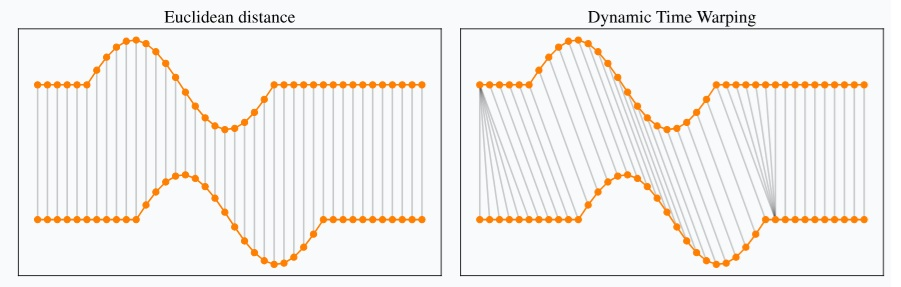

Image from https://rtavenar.github.io/blog/dtw.html

**Pros:**

* **Handles Temporal Shifts:** DTW is robust to shifts in time. It can align time series even when they are stretched or compressed along the time axis.

* **Flexible Similarity Measure:** DTW provides a more flexible and accurate measure of similarity for time series compared to simple methods like Euclidean distance, especially when there is temporal misalignment.

* **General Purpose:** DTW can be applied to a wide range of problems involving time series, from speech and audio processing to medical signal analysis.

**Cons:**

* **Computationally Expensive:** The basic DTW algorithm has a time complexity of
$O(n^2)$, where $n$ is the length of the time series. This can be slow for long sequences.

* **Overfitting:** If not properly tuned or constrained, DTW can overfit the alignment to the noise in the data, leading to inaccurate comparisons.

* **No Consideration for Global Shape:** DTW optimizes local alignment, but this might lead to overemphasis on small local features rather than global patterns in the time series.

* **Distance Matrix Size:** Since DTW requires constructing a full $n \text{ } x \text{ } n$ distance matrix, it can be memory-intensive for large datasets.





### Non-Linear Adaptive Averaging Functions

The **Non-Linear Adaptive Averaging Function (NLAAF)** is a signal processing technique designed to improve the quality of a signal by adaptively adjusting how averaging is applied based on the characteristics of the signal itself. Unlike simple linear averaging methods (such as moving average filters), which apply the same weight or averaging function to all data points, NLAAF adjusts the averaging process dynamically according to the local behavior or properties of the signal.

* The idea behind NLAAF is to use local signal characteristics to determine how much averaging should be applied at each point in the signal. For example, at regions where the signal changes rapidly (edges or transitions), the averaging might be reduced or avoided, so the filter does not blur important features. In regions where the signal is more uniform or contains noise, stronger smoothing or averaging is applied.

* The non-linear nature of the filter allows it to better handle complex signals with noise and varying levels of smoothness, making it more adaptable and capable of preserving important features compared to traditional linear filters.

**Concepts:**

* **Non-Linear:** NLAAF is a non-linear filter, meaning that it doesn't apply a linear weighting to each data point in the signal. Instead, the function may apply a more complex, non-linear operation to smooth the signal while preserving important features like edges or rapid transitions that a linear filter might blur or distort.

* **Adaptive:** The term "adaptive" means that the filter adjusts itself to the characteristics of the data. For example, it might apply stronger smoothing where the signal is relatively stable and less smoothing where the signal changes rapidly. This is important when dealing with signals that contain both noise and sharp transitions, as it can help preserve the important parts of the signal while reducing noise.

* **Averaging Function:** Averaging refers to combining multiple data points in some way to produce a smoothed value. In NLAAF, this function is not fixed or uniform across the entire signal, but changes depending on the local context of the signal.

</br>

**Note:** There are two NLAAF function in this tutorial.

* **NLAAF 1** - Applies DTW to two small windows (pieces) and determines the average of the pieces. These averages are used to build a center piece.

* **NLAAF 2** - same as NLAAF 1, except a specified number of pieces greater than 2 are used to build the center piece.


###Iterative Constrained Dynamic Time Warping (ICDTW)

**Iterative Constrained Dynamic Time Warping (ICDTW)** is an enhanced version of the standard Dynamic Time Warping (DTW) algorithm, designed to address some of the limitations of DTW, especially in terms of computational efficiency and accuracy when comparing time series with similar patterns but differing temporal alignments.

**FEATURES:**

**Iterative Approach:**

* ICDTW modifies the standard DTW algorithm by iteratively refining the alignment between two time series. Instead of computing the DTW distance in a single pass, ICDTW takes an iterative approach, adjusting the alignment progressively.

* During each iteration, constraints are applied to limit the warping path and force the algorithm to focus on specific parts of the time series. This helps to improve the accuracy of the alignment by preventing excessive warping in regions where it may not be necessary.

**Constrained Path:**

* One of the main advantages of ICDTW over standard DTW is that it applies constraints to the warping path. These constraints limit how much the time series can be "stretched" or "compressed" along the time axis. By doing so, ICDTW restricts the amount of warping to more reasonable bounds, preventing overfitting to noise or small variations that could distort the alignment.

* These constraints can be implemented in various ways, such as setting a maximum distance for any warping step or enforcing monotonicity (i.e., the time indices of the two series must progress in the same direction).

**Improved Efficiency:**

* Standard DTW computes a full $n × m$ distance matrix for two sequences of length $n$ and $m$. This can be computationally expensive, especially for long time series. By applying constraints iteratively, ICDTW reduces the search space for the optimal alignment, thus improving computational efficiency.

* The algorithm iterates over multiple passes to refine the alignment progressively, ensuring that only the relevant parts of the time series are aligned at each step.

**Refinement:**

* In each iteration, ICDTW refines the warping path based on the previously computed alignment. This iterative process leads to an optimal or near-optimal alignment over multiple passes, improving the final alignment accuracy compared to the standard DTW approach.

**STEPS:**

1. **Initial Alignment:** Start by performing a basic alignment between the two time series using standard DTW.

2. **Apply Constraints:** During each iteration, impose constraints that restrict the allowable warping paths between the two time series. These constraints might include things like limiting the range of movement in the warping path or ensuring monotonicity.

3. **Refinement:** After applying constraints, refine the alignment by recalculating the DTW distance with the constrained path.

4. **Repeat:** The iterative process is repeated until the alignment converges to an optimal or sufficiently accurate solution.

**Benefits:**

* **Handling Large Variations:** By constraining the warping path and iterating over the alignment, ICDTW can more effectively handle large variations in the time series (e.g., different lengths, tempo variations, or large misalignments) compared to traditional DTW.

* **Preserving Important Features:** The application of constraints during the iterative process helps to prevent the alignment from distorting important features in the time series, such as sharp transitions or edges. This is especially useful in time series that contain noise or irregularities.

* **Improved Efficiency:** The iterative refinement approach makes ICDTW more computationally efficient, particularly when dealing with long time series, as it limits the warping search space through constraints.

* **Flexibility:** ICDTW can be customized with various constraints, making it more adaptable to specific types of time series comparisons. For example, one might enforce temporal locality constraints or restrict the allowable distance for warping at each step.

###DTW Barycenter Averaging

**DTW Barycenter Averaging (DBA)** is a technique used to compute an average of multiple time series using Dynamic Time Warping (DTW). Unlike traditional methods of averaging time series, which simply compute the mean of corresponding points, DBAs use DTW to align the time series before averaging. This allows for the averaging of time series that may have temporal misalignments, speed variations, or shifts. The primary goal of DBA is to find a central tendency or "average" time series that best represents a set of input time series, while accounting for non-linear alignments in the data.

**Concepts:**

* **Dynamic Time Warping (DTW):**

  * DTW is a powerful algorithm used to measure similarity between two time series that may differ in speed or alignment. It computes an optimal match between two time series by warping them non-linearly along the time axis.

* **Barycenter:**

  * The term "barycenter" refers to the center of mass or average of a set of data points. In the context of DBA, the barycenter represents an average time series, which is computed by iteratively aligning and averaging multiple time series.

* **Averaging of Time Series**:

  * Traditional averaging of time series simply computes the average of each corresponding time point across all series. However, this approach does not work well when time series are not perfectly aligned.

  * DTW Barycenter Averaging solves this by aligning the time series first and then computing a pointwise average of the aligned sequences.

**How DTW Barycenter Averaging (DBA) Works:**

**1. Initialization:**

  * The algorithm starts with an initial guess for the barycenter, which can be any of the input time series or some other starting point.

**2. Iterative Process:**

  * In each iteration, the algorithm performs the following steps:

    **1. Alignment using DTW:** For each time series in the dataset, the DTW algorithm is used to align that series with the current barycenter. This ensures that corresponding points in each time series are matched optimally, despite any differences in time or speed.

    **2. Averaging:** After aligning the time series, the average of all the aligned time series is computed at each time point, creating a new candidate barycenter.

**3. Convergence:**

  * The process is repeated iteratively. In each iteration, the barycenter is updated, and the DTW alignment is recomputed. The algorithm converges when the barycenter stops changing significantly between iterations or after a pre-defined number of iterations.

**4. Final Barycenter:**

  * The final output of the algorithm is a time series that represents the average (or barycenter) of the input time series. This series is aligned in a way that best captures the common underlying pattern of the input sequences.

**Advantages of DTW Barycenter Averaging:**

**1. Handling Temporal Misalignments:**

  * DBA excels in scenarios where the input time series are misaligned or have different lengths, which is common in many real-world applications (e.g., speech, motion tracking). By using DTW to align the series first, DBA can compute a meaningful average despite these misalignments.

**2. Robustness to Noise:**

  * Since DBA aligns the time series before averaging, it tends to be more robust to noise than traditional averaging methods. By aligning the time series, DBA reduces the impact of small fluctuations that may not represent the true underlying patterns.

**3. Flexible for Variable Length Time Series:**

  * One of the key benefits of DBA is its ability to handle time series of different lengths. Traditional averaging methods require the series to be of equal length, but DBA can work with series of varying lengths by aligning them first.

**4. Improved Pattern Recognition:**

  * DBA can produce more accurate representations of a group of time series, making it useful for pattern recognition tasks. The barycenter obtained through DTW alignment can better represent the shared characteristics of the input time series.

In [ ]:
#generating synthetic data
import numpy as np
import matplotlib.pyplot as plt
n_series = 15
length = 150

series = list()
padding_length=30
indices = range(0, length-padding_length)
main_profile_gen = np.array([np.sin(2*np.pi*j/len(indices)) for j in indices])
randomizer = lambda j:np.random.normal(j,0.02)
randomizer_fun = np.vectorize(randomizer)
for i in range(0,n_series):
    n_pad_left = np.random.randint(0,padding_length)
    #adding zero at the start or at the end to shif the profile
    series_i = np.pad(main_profile_gen,(n_pad_left,padding_length-n_pad_left),mode='constant',constant_values=0)
    #chop some of the end to prove it can work with multiple lengths
    l = np.random.randint(length-20,length+1)
    series_i = series_i[:l]
    #randomize a bit
    series_i = randomizer_fun(series_i)

    series.append(series_i)
# series = np.array(series)

#plotting the synthetic data

plt.figure(figsize=(8, 3))
for s in series:
    plt.plot(range(0,len(s)), s)
plt.ylabel('Amplitude');plt.xlabel('Time');plt.show()

In [ ]:
from lib.dsp import performNLAAF1, performNLAAF2

n_series = 15
length = 150

series = list()
padding_length=30
indices = range(0, length-padding_length)
main_profile_gen = np.array([np.sin(2*np.pi*j/len(indices)) for j in indices])
randomizer = lambda j:np.random.normal(j,0.02)
randomizer_fun = np.vectorize(randomizer)
for i in range(0,n_series):
    n_pad_left = np.random.randint(0,padding_length)
    #adding zero at the start or at the end to shif the profile
    series_i = np.pad(main_profile_gen,(n_pad_left,padding_length-n_pad_left),mode='constant',constant_values=0)
    #chop some of the end to prove it can work with multiple lengths
    l = np.random.randint(length-20,length+1)
    series_i = series_i[:l]
    #randomize a bit
    series_i = randomizer_fun(series_i)

    series.append(series_i)

# the feature of NLAAF: the length of center cannot be controlled
# if we want to get the center of 2 time series A (N points) and B (M points) by NLAAF
# the length of center is in the range of [max(N, M), N + M - 1]

average_series_NLAAF1 = performNLAAF1(list(series), show=True)
average_series_NLAAF2 = performNLAAF2(list(series), show=True)

In [ ]:
from lib.dsp import performICDTW

n_series = 15
length = 150

series = list()
padding_length=30
indices = range(0, length-padding_length)
main_profile_gen = np.array([np.sin(2*np.pi*j/len(indices)) for j in indices])
randomizer = lambda j:np.random.normal(j,0.02)
randomizer_fun = np.vectorize(randomizer)
for i in range(0,n_series):
    n_pad_left = np.random.randint(0,padding_length)
    #adding zero at the start or at the end to shif the profile
    series_i = np.pad(main_profile_gen,(n_pad_left,padding_length-n_pad_left),mode='constant',constant_values=0)
    #chop some of the end to prove it can work with multiple lengths
    l = np.random.randint(length-20,length+1)
    series_i = series_i[:l]
    #randomize a bit
    series_i = randomizer_fun(series_i)

    series.append(series_i)

# ICDTW is an iterative approach for time series averaging
# with ICDTW we can control the length of center
average_series_ICDTW = performICDTW(list(series), show=True)

In [ ]:
from lib.dsp import performDBA

n_series = 15
length = 150

series = list()
padding_length=30
indices = range(0, length-padding_length)
main_profile_gen = np.array([np.sin(2*np.pi*j/len(indices)) for j in indices])
randomizer = lambda j:np.random.normal(j,0.02)
randomizer_fun = np.vectorize(randomizer)
for i in range(0,n_series):
    n_pad_left = np.random.randint(0,padding_length)
    #adding zero at the start or at the end to shif the profile
    series_i = np.pad(main_profile_gen,(n_pad_left,padding_length-n_pad_left),mode='constant',constant_values=0)
    #chop some of the end to prove it can work with multiple lengths
    l = np.random.randint(length-20,length+1)
    series_i = series_i[:l]
    #randomize a bit
    series_i = randomizer_fun(series_i)

    series.append(series_i)
    print(len(series_i))

# DBA is a baseline!
# the length of center can also be controlled
# an iterative approach
average_series_DBA = performDBA(series, show=True)

In [ ]:
from lib.dsp import performSOFTDBA

n_series = 15
length = 150

series = list()
padding_length=30
indices = range(0, length-padding_length)
main_profile_gen = np.array([np.sin(2*np.pi*j/len(indices)) for j in indices])
randomizer = lambda j:np.random.normal(j,0.02)
randomizer_fun = np.vectorize(randomizer)
for i in range(0,n_series):
    n_pad_left = np.random.randint(0,padding_length)
    #adding zero at the start or at the end to shif the profile
    series_i = np.pad(main_profile_gen,(n_pad_left,padding_length-n_pad_left),mode='constant',constant_values=0)
    #chop some of the end to prove it can work with multiple lengths
    l = np.random.randint(length-20,length+1)
    series_i = series_i[:l]
    #randomize a bit
    series_i = randomizer_fun(series_i)
    if len(series_i) < 150: #SoftDBA expects entries of same length
      pad = 150 - len(series_i)
      for p in range(pad):
        series_i = np.append(series_i,0)

    series.append(series_i)

# # convert an un-convex problem into an convex optimization
average_series_SoftDBA = performSOFTDBA(list(series), show=True)

# Decompose


### 1. **Seasonal Decomposition:**

**Seasonal decomposition** is a technique used in time series analysis to break down a time series into its individual components: trend, seasonality, and residual (or noise). This helps to better understand the underlying structure of the data and is often used to detect patterns, forecast future values, and improve the accuracy of predictive models.

</br>

The primary goal of seasonal decomposition is to separate the time series into components that represent different underlying behaviors.

</br>

The model can be expressed as $y(t) = T(t) + S(t) + R(t)$, where $T(t)$ is the trend, $S(t)$ is the seasonal component, and $R(t)$ is the residual:

* **Trend:** The long-term movement or direction in the data. It represents the general tendency of the data to increase or decrease over time, ignoring short-term fluctuations.

* **Seasonality:** The repeating and predictable patterns or cycles that occur at regular intervals, such as daily, weekly, monthly, or yearly. This component captures fluctuations that recur over a fixed period.

* **Residual:** The "leftover" noise or random fluctuations in the data that can't be explained by the trend or seasonal components. This component represents irregular variations, outliers, or random events.



**Steps:**

**1. Estimating the Trend Component:**

  * The trend is estimated by smoothing the original time series data. This can be done using various methods like moving averages, locally weighted regression, or smoothing splines. The goal is to remove the seasonal and residual components, leaving behind the underlying long-term trend.

**2. Estimating the Seasonal Component:**

  * After extracting the trend, the seasonal component is found by calculating the differences between the original data and the estimated trend. This is typically done by averaging the values that occur at the same time of the year or time period, e.g., averaging monthly sales for each month of the year.

**3. Residuals:**

  * The residual component is simply what remains after removing the trend and seasonal components. It is calculated by subtracting the trend and seasonal components from the original data. Ideally, this should resemble random noise, with no clear patterns.

In [ ]:
from lib.dsp import seasonal_decomposition, sine_wave
import numpy as np
import matplotlib.pyplot as plt

x = my_array = np.arange(1000)

Trend = 1.5 * np.linspace(0, 10, 1000)
plt.plot(x,Trend)
plt.title("Generated Trend")

Seasonal = sine_wave(duration=10, sampling_rate=100, frequency=0.5, show = True)

Residual = np.random.normal(0, 0.5, 10 * 100)
plt.plot(x,Residual)
plt.title("Generated Residual")


signal = Seasonal + Trend + Residual

_ = seasonal_decomposition(signal, period=200, show=True)

### 2. **Empirical Mode Decomposition (EMD):**

Empirical Mode Decomposition (EMD) is a data-driven method for analyzing non-linear and non-stationary time series data. It decomposes a time series into a set of intrinsic mode functions (IMFs), which represent different oscillatory modes of the data. These IMFs are derived from the data itself, without relying on a pre-defined basis, making EMD particularly useful for analyzing complex, real-world signals that do not follow simple trends or seasonality.

* EMD decomposes a signal into intrinsic mode functions (IMFs) based on local extrema. Each IMF represents a specific oscillatory mode. Mathematically, a signal $x(t)$ is decomposed as $x(t) = \sum_{i=1}^{n} C_i(t) + R(t)$, where $C_i(t)$ is the $i$-th IMF and $R(t)$ is the residual.

</br>

**Key Concepts of EMD:**

**1. Intrinsic Mode Functions (IMFs):**

  * IMFs are components that EMD extracts from the original time series. Each IMF captures a specific oscillatory mode of the signal, with each IMF having:

    * **Zero mean:** The average value of the IMF is zero.
    
    * **Monotonicity of extrema:** The number of zero-crossings and extrema (peaks and valleys) in an IMF must either be equal or differ by at most one.

  * These IMFs represent different frequency scales of the signal, from high-frequency oscillations (fine details) to low-frequency trends (general behavior).

**2. The Decomposition Process:**

  * EMD works by iteratively sifting through the original signal and extracting IMFs one by one. This is done by:

    1. Identifying the local maxima and local minima of the signal.

    2. Interpolating between the maxima and minima to create an envelope for the signal.

    3. Subtracting the envelope from the original signal to obtain a component (the first IMF).

    4. The process is repeated on the residual signal until it meets the stopping criterion (i.e., no more IMFs can be extracted).

**3. Residual Trend:**

  * After extracting all the IMFs, what remains is the residual trend, which is the long-term average of the signal, often referred to as the final component in the decomposition process.

**4. Non-Linear and Non-Stationary Data:**

  * Unlike traditional methods like Fourier transforms or wavelets, which assume that the signal is stationary (its statistical properties do not change over time), EMD is designed to handle non-stationary and non-linear data. This makes it suitable for a wide range of real-world applications where the underlying signal changes over time.

**Steps of the EMD Process:**

**1. Sifting Process:**

  * The signal is first "sifted" to extract the high-frequency oscillations (IMFs) using the local maxima and minima. This involves:

      1. Identifying the local maxima and minima.

      2. Interpolating between the maxima and minima to create upper and lower envelopes.
      
      3. Subtracting the mean of the upper and lower envelopes from the signal to obtain the IMF.

      4. Repeating the process on the residual signal until the stopping criterion is met.

**2. Iterative Extraction:**

  * This process continues for several iterations. Each iteration extracts an IMF, and what remains after extracting each IMF is a progressively lower-frequency component of the signal. The decomposition stops when the residual signal is a monotonic function (or when other convergence criteria are met).

**3. Final Residual:**

  * The final residual is often considered the trend of the original time series, which has no oscillatory modes left.

**Pros:**

* **Data-Driven:** EMD does not assume a pre-defined model or basis (like Fourier transforms or wavelets), making it highly flexible for complex, real-world signals.

* **Adaptability:** It works well for non-stationary, non-linear signals, making it suitable for a wide variety of applications, including those where other methods may struggle.

* **No Assumptions:** Unlike methods such as Fourier or wavelet transforms, EMD does not require assumptions about the signal’s behavior or frequency content.

* **Multiscale Analysis:** It allows for multiscale decomposition, which helps to capture different frequency components of the signal.

**Cons:**

* **Mode Mixing:** EMD can sometimes suffer from mode mixing, where different frequency components are incorrectly mixed together in the same IMF. This can occur if the signal is highly irregular or contains sharp discontinuities.

* **Sensitivity to Noise:** EMD can be sensitive to noise, especially for signals with small-scale variations.

* **Computational Cost:** The iterative nature of the method can be computationally expensive for large datasets.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lib.dsp import vmd_decomposition, sine_wave, chirp_wave_linear, chirp_wave_hyperbolic, chirp_wave_exponential
import matplotlib.pyplot as plt
duration = 10
sampling_rate = 100

x = my_array = np.arange(duration*sampling_rate)

""" Generate a Trend
Trend = 1.5 * np.linspace(0, duration, duration*sampling_rate)
plt.plot(x,Trend)
plt.title("Generated Trend")
#"""


""" # Seasonal Signals Only
Seasonal_1 = sine_wave(duration=duration, sampling_rate=sampling_rate, amplitude=5, frequency=0.2,show=True)
Seasonal_2 = sine_wave(duration=duration, sampling_rate=sampling_rate, amplitude=4, frequency=0.5,show=True)
Seasonal_3 = sine_wave(duration=duration, sampling_rate=sampling_rate, amplitude=3, frequency=1.0,show=True)
Seasonal_4 = sine_wave(duration=duration, sampling_rate=sampling_rate, amplitude=2, frequency=2.0,show=True)
Seasonal_5 = sine_wave(duration=duration, sampling_rate=sampling_rate, amplitude=1, frequency=4.0,show=True)

Noise = np.random.normal(0, 0.01, 1000)
plt.plot(x,Noise)
plt.title("Generated Noise")

signal = Seasonal_1 + Seasonal_2 + Seasonal_3 + Seasonal_4 + Seasonal_5 #+ Noise
#signal = Seasonal_1 + Seasonal_2 + Seasonal_3 + Seasonal_4 + Trend #+ Noise
#"""

#""" # Non Liniear Signals
chirp_linear_ = chirp_wave_linear(f0=0.1, c=0.25, show=True)
chirp_hyperbolic_ = chirp_wave_hyperbolic(f0=0.1, f1=2.6, show=True)
chirp_exponential_ = chirp_wave_exponential(f0=0.1, k=1.5, show=True)

Noise = np.random.normal(0, 0.01, 1000)
plt.plot(x,Noise)
plt.title("Generated Noise")

signal = chirp_linear_ + chirp_hyperbolic_ + chirp_exponential_ #+ Noise
#"""

_ = emd_decomposition(signal, show=True)

### 3. **Ensemble Empirical Mode Decomposition (EEMD):**


**Ensemble Empirical Mode Decomposition (EEMD)** is an improved version of the Empirical Mode Decomposition (EMD) method, designed to overcome some of the limitations of EMD, particularly mode mixing and sensitivity to noise. EEMD combines the strength of EMD for analyzing non-linear and non-stationary signals with a statistical approach to improve the robustness and reliability of the decomposition process.

EEMD addresses the problems of mode mixing and noise sensitivity by introducing the concept of ensemble averaging. The main idea behind EEMD is to add white noise to the original signal and then perform the standard EMD process on the noisy signal. By repeating this process multiple times with different realizations of white noise, the resulting IMFs are averaged to obtain a more stable and reliable decomposition.

**Steps:**

**1. Add White Noise:**

  * White noise (random noise with a flat spectral density) is added to the original signal. This introduces randomness into the signal, helping to avoid the bias caused by mode mixing and improving the decomposition process.

**2. Decompose with EMD:**

  * Perform Empirical Mode Decomposition on the noisy signal. This step results in a set of IMFs that are influenced by the added noise.

**3. Repeat the Process:**

  * The process is repeated several times, each time adding a different realization of white noise to the signal. For each noisy signal, a separate EMD decomposition is performed, resulting in a different set of IMFs.

**4. Ensemble Averaging:**

  * After completing the decompositions for all white noise realizations, the IMFs from each decomposition are averaged. The averaging process helps to cancel out the effects of the white noise, leaving behind a more accurate representation of the true intrinsic oscillations in the original signal.

**5. Final Decomposition:**

  * The resulting IMFs, averaged over the ensemble of noisy realizations, form the final set of IMFs that are less influenced by noise and mode mixing.

**Advantages of EEMD over EMD:**

**1. Reduced Mode Mixing:**

  * By adding white noise and performing the decomposition multiple times, EEMD mitigates the problem of mode mixing that can occur in traditional EMD. The averaging process helps to separate components more clearly into different frequency bands.

**2. Noise Robustness:**

  * The introduction of white noise in EEMD helps to "drown out" the effects of real-world noise, making the decomposition more stable and robust, especially in the presence of noise or irregularities in the data.

**3. More Reliable IMFs:**

  * The ensemble averaging step leads to more stable and meaningful IMFs, as the noise and instability from individual decompositions are averaged out, resulting in IMFs that better represent the underlying dynamics of the signal.

**4. Better Handling of Complex Signals:**

  * EEMD is better suited for dealing with complex, non-linear, and non-stationary signals, such as those found in biomedical data, mechanical systems, and financial data, where EMD alone may struggle.

In [ ]:
from lib.dsp import eemd_decomposition, vmd_decomposition, sine_wave, chirp_wave_linear, chirp_wave_hyperbolic, chirp_wave_exponential
import matplotlib.pyplot as plt
import numpy as np


duration = 10
sampling_rate = 100

x = my_array = np.arange(duration*sampling_rate)

""" Generate a Trend
Trend = 1.5 * np.linspace(0, duration, duration*sampling_rate)
plt.plot(x,Trend)
plt.title("Generated Trend")
#"""


#""" # Seasonal Signals Only
Seasonal_1 = sine_wave(duration=duration, sampling_rate=sampling_rate, amplitude=5, frequency=0.2,show=True)
Seasonal_2 = sine_wave(duration=duration, sampling_rate=sampling_rate, amplitude=4, frequency=0.5,show=True)
Seasonal_3 = sine_wave(duration=duration, sampling_rate=sampling_rate, amplitude=3, frequency=1.0,show=True)
Seasonal_4 = sine_wave(duration=duration, sampling_rate=sampling_rate, amplitude=2, frequency=2.0,show=True)
Seasonal_5 = sine_wave(duration=duration, sampling_rate=sampling_rate, amplitude=1, frequency=4.0,show=True)

Noise = np.random.normal(0, 0.01, 1000)
plt.plot(x,Noise)
plt.title("Generated Noise")

signal = Seasonal_1 + Seasonal_2 + Seasonal_3 + Seasonal_4 + Seasonal_5 #+ Noise
#signal = Seasonal_1 + Seasonal_2 + Seasonal_3 + Seasonal_4 + Trend #+ Noise
#"""

""" # Non Liniear Signals
chirp_linear_ = chirp_wave_linear(f0=0.1, c=0.25, show=True)
chirp_hyperbolic_ = chirp_wave_hyperbolic(f0=0.1, f1=2.6, show=True)
chirp_exponential_ = chirp_wave_exponential(f0=0.1, k=1.5, show=True)
#Seasonal_1 = sine_wave(duration=duration, sampling_rate=sampling_rate, amplitude=5, frequency=0.2,show=True)
#Seasonal_2 = sine_wave(duration=duration, sampling_rate=sampling_rate, amplitude=4, frequency=0.5,show=True)

Noise = np.random.normal(0, 0.01, 1000)
plt.plot(x,Noise)
plt.title("Generated Noise")

#signal = chirp_linear_ + Seasonal_1 + Seasonal_2 #+ Noise
signal = chirp_linear_ + chirp_hyperbolic_ + chirp_exponential_ #+ Noise
#"""

# EEMD default values: noise_width = 0.05, ensemble_size = 100
# noise_width is the width of the white noise to add to the signal for ensemble generation
# ensemble_size is the number of ensemble trials to perform
_ = eemd_decomposition(signal, noise_width=0.05, ensemble_size=100, show=True)

### 4. **Complete Ensemble Empirical Mode Decomposition (CEEMD):**

Complete Ensemble Empirical Mode Decomposition (CEEMD) is an advanced method that further improves upon Ensemble Empirical Mode Decomposition (EEMD), addressing some of the remaining issues with noise interference and mode mixing, making it even more robust and effective in decomposing complex, non-linear, and non-stationary time series signals.

CEEMD is an enhancement of EEMD that eliminates the residual noise that can still affect the decomposition process. Instead of adding just white noise in each ensemble realization (like in EEMD), CEEMD adds both positive and negative white noise to the signal. This addition of positive and negative noise in each iteration helps to cancel out the noise effects more effectively, resulting in a cleaner decomposition.


**The steps for CEEMD are the same as EEMD, except for Add Noise:**

* Instead of adding just positive white noise (as in EEMD), both positive and negative white noise of equal amplitude are added to the signal. This makes the process more symmetric and helps to cancel out noise artifacts more effectively.

In [ ]:
from lib.dsp import ceemd_decomposition, sine_wave, chirp_wave_linear, chirp_wave_hyperbolic, chirp_wave_exponential
import numpy as np
import matplotlib.pyplot as plt

duration = 10
sampling_rate = 100

x = my_array = np.arange(duration*sampling_rate)

""" Generate a Trend
Trend = 1.5 * np.linspace(0, duration, duration*sampling_rate)
plt.plot(x,Trend)
plt.title("Generated Trend")
#"""


#""" # Seasonal Signals Only
Seasonal_1 = sine_wave(duration=duration, sampling_rate=sampling_rate, amplitude=5, frequency=0.2,show=True)
Seasonal_2 = sine_wave(duration=duration, sampling_rate=sampling_rate, amplitude=4, frequency=0.5,show=True)
Seasonal_3 = sine_wave(duration=duration, sampling_rate=sampling_rate, amplitude=3, frequency=1.0,show=True)
Seasonal_4 = sine_wave(duration=duration, sampling_rate=sampling_rate, amplitude=2, frequency=2.0,show=True)
Seasonal_5 = sine_wave(duration=duration, sampling_rate=sampling_rate, amplitude=1, frequency=4.0,show=True)

Noise = np.random.normal(0, 0.01, 1000)
plt.plot(x,Noise)
plt.title("Generated Noise")

signal = Seasonal_1 + Seasonal_2 + Seasonal_3 + Seasonal_4 + Seasonal_5 #+ Noise
#signal = Seasonal_1 + Seasonal_2 + Seasonal_3 + Seasonal_4 + Trend #+ Noise
#"""

""" # Non Liniear Signals
chirp_linear_ = chirp_wave_linear(f0=0.1, c=0.25, show=True)
chirp_hyperbolic_ = chirp_wave_hyperbolic(f0=0.1, f1=2.6, show=True)
chirp_exponential_ = chirp_wave_exponential(f0=0.1, k=1.5, show=True)
#Seasonal_1 = sine_wave(duration=duration, sampling_rate=sampling_rate, amplitude=5, frequency=0.2,show=True)
#Seasonal_2 = sine_wave(duration=duration, sampling_rate=sampling_rate, amplitude=4, frequency=0.5,show=True)

Noise = np.random.normal(0, 0.01, 1000)
plt.plot(x,Noise)
plt.title("Generated Noise")

#signal = chirp_linear_ + Seasonal_1 + Seasonal_2 #+ Noise
signal = chirp_linear_ + chirp_hyperbolic_ + chirp_exponential_ #+ Noise
#"""

# CEEMD
_ = ceemd_decomposition(signal, show=True)

### 5. **Variational Mode Decomposition (VMD):**

Variational Mode Decomposition (VMD) is a signal processing technique that is used to decompose a complex signal into a set of intrinsic modes or modes of oscillation. It is particularly useful for analyzing non-stationary and non-linear signals, and it has gained popularity as an alternative to methods like Empirical Mode Decomposition (EMD) and its variations (such as CEEMD).

</br>

VMD decomposes a signal into a set of oscillatory modes with varying frequencies. It minimizes the mode mixing problem by solving a variational optimization problem. The decomposition can be expressed as $x(t) = \sum_{i=1}^{n} u_i(t) + R(t)$, where $u_i(t)$ are the modes and $R(t)$ is the residual.

**Concepts:**

**1. Intrinsic Mode Functions (IMFs):**

  * Similar to EMD, VMD decomposes a signal into intrinsic mode functions (IMFs), which are the individual frequency components that make up the signal. These IMFs correspond to oscillatory modes or frequency bands that are embedded in the signal.

**2. Non-Stationary and Non-Linear Signals:**

  * VMD is especially useful for analyzing signals that are non-linear (their properties change over time) and non-stationary (their statistical properties vary with time). These types of signals are commonly found in real-world data like seismic signals, biomedical signals (e.g., EEG, ECG), and financial data.

**3. Variational Approach:**

  * Unlike traditional decomposition techniques (such as EMD), which use iterative sifting processes to extract IMFs, VMD uses a variational optimization approach to directly decompose the signal into modes. This optimization problem is solved by minimizing a cost function that balances the frequency bandwidth of each mode and the residual of the signal.

**4. Mode Decomposition:**

  * The goal of VMD is to separate a signal into distinct frequency components (modes) without requiring prior knowledge of the signal’s structure. The decomposition is done in a way that each mode is associated with a specific frequency range, and there is minimal overlap between modes.

**Steps:**

VMD is based on an optimization framework where the objective is to find a set of modes such that their sum approximates the original signal. Here's a step-by-step breakdown of how VMD works:

**1. Signal Representation:**

  * VMD takes a time-domain signal $x(t)$ and aims to represent it as the **sum** of a set of modes $u_k(t)$, each of which has a specific frequency component. The modes are represented as functions with limited frequency bandwidths.

**2. Frequency Localization:**

  * Each mode is associated with a center frequency $F_k$, and the objective is to make the **frequency bandwidth** of each mode as narrow as possible. This is done by limiting the frequency range of each mode, which helps in extracting specific frequency components from the signal.

**3. Variational Optimization:**

VMD solves an optimization problem in the form of a variational principle to find the modes and their associated frequencies. The optimization problem seeks to minimize the following cost function:

</br>

  $\frac{min}{u_k(t),f_k} \sum_{k=1}^k \left( | \frac{\delta}{\delta t} u_k(t) |^2 + α | f_k - \hat{f}_k |^2 \right)$

</br>

Where:

* $u_k(t)$is the $k$-th mode.

* $f_k$ is the central frequency of the $k$-th mode.

* $\hat{f}$ is the reference frequency.

* $α$ is a regularization parameter that controls the balance between bandwidth and frequency accuracy.

* The first term in the cost function is the **bandwidth** of the mode, while the second term penalizes deviations from the desired central frequency.

**4. Iterative Update:**

The algorithm uses an iterative process to update the modes and their associated frequencies in order to minimize the cost function. This is done by alternating between updating the modes and adjusting the central frequencies until convergence is achieved.

**5. Reconstruction:**

After obtaining the modes, the original signal can be reconstructed by summing all the extracted modes. The result is a signal representation in terms of different oscillatory components, each with a well-defined frequency range.

**Pros:**

* **Precise Frequency Separation:**

  * VMD ensures that the extracted modes correspond to distinct frequency bands, reducing mode mixing compared to traditional methods like EMD.

* **Noise Robustness:**

  * VMD is more robust to noise and is less sensitive to high-frequency noise than methods like EMD, which can struggle in noisy environments.

* **Flexible and Generalizable:**

  * VMD works well for a wide range of non-linear and non-stationary signals, making it applicable across many domains like biomedical, financial, and geophysical analysis.

**Cons:**

* **Parameter Sensitivity:**

  * The performance of VMD depends on selecting the right parameters, such as the number of modes $K$, the regularization parameter $α$, and the convergence tolerance. Incorrect parameter settings can lead to poor results.

* **Computational Complexity:**

  * VMD requires solving an optimization problem for each mode, which can be computationally intensive for large datasets or real-time applications.

In [ ]:
from lib.dsp import vmd_decomposition, sine_wave, chirp_wave_linear, chirp_wave_hyperbolic, chirp_wave_exponential
import matplotlib.pyplot as plt

duration = 10
sampling_rate = 100

x = my_array = np.arange(duration*sampling_rate)


""" Generate a Trend
Trend = 1.5 * np.linspace(0, duration, duration*sampling_rate)
plt.plot(x,Trend)
plt.title("Generated Trend")
#"""


#""" # Seasonal Signals Only
Seasonal_1 = sine_wave(duration=duration, sampling_rate=sampling_rate, amplitude=5, frequency=0.2,show=True)
Seasonal_2 = sine_wave(duration=duration, sampling_rate=sampling_rate, amplitude=4, frequency=0.5,show=True)
Seasonal_3 = sine_wave(duration=duration, sampling_rate=sampling_rate, amplitude=3, frequency=1.0,show=True)
Seasonal_4 = sine_wave(duration=duration, sampling_rate=sampling_rate, amplitude=2, frequency=2.0,show=True)
Seasonal_5 = sine_wave(duration=duration, sampling_rate=sampling_rate, amplitude=1, frequency=4.0,show=True)

Noise = np.random.normal(0, 0.01, 1000)
plt.plot(x,Noise)
plt.title("Generated Noise")

signal = Seasonal_1 + Seasonal_2 + Seasonal_3 + Seasonal_4 + Seasonal_5 #+ Noise
#signal = Seasonal_1 + Seasonal_2 + Seasonal_3 + Seasonal_4 + Trend #+ Noise
#"""

""" # Non Liniear Signals
chirp_linear_ = chirp_wave_linear(f0=0.1, c=0.25, show=True)
chirp_hyperbolic_ = chirp_wave_hyperbolic(f0=0.1, f1=2.6, show=True)
chirp_exponential_ = chirp_wave_exponential(f0=0.1, k=1.5, show=True)

Noise = np.random.normal(0, 0.01, 1000)
plt.plot(x,Noise)
plt.title("Generated Noise")

signal = chirp_linear_ + chirp_hyperbolic_ + chirp_exponential_ #+ Noise
#"""

# VMD Default Values: K=5, alpha=2000
# K is the number of modes to decompose the signal into
# alpha is the moderate bandwidth constraint
_ = vmd_decomposition(signal, K=6, alpha=1000, show=True)

## Singular-Spectrum Analysis

Source: https://www.kaggle.com/code/jdarcy/introducing-ssa-for-time-series-decomposition

The notation in this section will mostly follow that used in the book, [*Analysis of Time Series Structure: SSA and Related Techniques*](https://www.crcpress.com/Analysis-of-Time-Series-Structure-SSA-and-Related-Techniques/Golyandina-Nekrutkin-Zhigljavsky/p/book/9781584881940) by N. Golyandina, V. Nekrutkin and A. Zhigljavsky—an excellent reference containing more proofs and details about SSA than you could possibly ever need to know. Here, we'll go a step further and develop a Python implementation for SSA. For consistency between the mathematical notation and the code, all matrix and summation indexing with begin at 0 instead of 1.

### From Time Series to Trajectory Matrix<a name="Section2.1"></a>
The first step of SSA is to map the time series $F$ to a sequence of multi-dimensional lagged vectors. Let an integer $L$ be the **window length**, $2 \le L \le N/2$. We form a 'window', given by the subseries $\{f_i, \ f_{i+1}, \ldots , \ f_{i+L-1}\}$, for  $i=0,\ldots,N-L$. We slide this window along the time series, forming a column vector, $X_i$, for each subseries. That is, we have

\begin{align*}
X_0 & = (f_0, \ f_1, \ f_2,  \ldots, \ f_{L-1} )^{\text{T}} \\
X_1 & = (f_1, \ f_2, \ f_3,  \ldots, \ f_L )^{\text{T}} \\
X_2 & = (f_2, \ f_3, \ f_4,  \ldots, \ f_{L+1} )^{\text{T}} \\
X_3 & = (f_3, \ f_4, \ f_5,  \ldots, \ f_{L+2} )^{\text{T}} \\
& \quad \quad \quad  \vdots \\
X_{N-L} & = (f_{N-L}, \ f_{N-L+1}, \ f_{N-L+2}, \ \ldots, \ f_{N-1} )^{\text{T}}.
\end{align*}

These column vectors form the $L$-*trajectory matrix*, $\mathbf{X}$, of the time series (hereafter just *trajectory matrix*):

$$\mathbf{X} = \begin{bmatrix}
f_0 & f_1 & f_2 & f_3 &\ldots & f_{N-L} \\
f_1 & f_2 & f_3 & f_4 &\ldots & f_{N-L+1} \\
f_2 & f_3 & f_4 & f_5 &\ldots & f_{N-L+2} \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
f_{L-1} & f_{L} & f_{L+1} & f_{L+2} & \ldots & f_{N-1} \\
\end{bmatrix}$$

From writing out the matrix above, it is clear that the elements of the *anti-diagonals* (that is, the diagonals running from bottom-left to top-right) are equal. This type of matrix is known as a ***Hankel*** matrix.

For our toy time series, I'll set the window length to 70, and defer discussion on how to select an appropriate window length. Let $K = N - L + 1$ represent the number of columns in the trajectory matrix. **We'll refer to the columns of $\mathbf{X}$ as the $L$-lagged vectors, and the rows as $K$-lagged vectors.**

### Decomposing the Trajectory Matrix<a name="Section2.2"></a>
The second step is decomposing the trajectory matrix with a [singular-value decomposition (SVD)](https://en.wikipedia.org/wiki/Singular-value_decomposition),

$$\mathbf{X} = \mathbf{U\Sigma V}^{\text{T}}$$
where:
* $\mathbf{U}$ is an $L \times L$ unitary matrix containing the orthonormal set of ***left singular vectors*** of $\mathbf{X}$ as columns;
* $\mathbf{\Sigma}$ is an $L \times K$ rectangular diagonal matrix containing $L$ ***singular values*** of $\mathbf{X}$, ordered from largest to smallest; and
* $\mathbf{V}$ is a $K \times K$ unitary matrix containing the orthonormal set of ***right singular vectors*** of $\mathbf{X}$ as columns.

The SVD of the trajectory matrix can be rewritten as
\begin{align*}
    \mathbf{X} & = \sum_{i=0}^{d-1}\sigma_i U_i V_i^{\text{T}} \\
               & \equiv \sum_{i=0}^{d-1}\mathbf{X}_i
\end{align*}
where $\sigma_i$ is the $i$th singular value, $U_i$ and $V_i$ are vectors representing the $i$th columns of $\mathbf{U}$ and $\mathbf{V}$, respectively, $d \le L$ is the *rank* of the trajectory matrix (which I shall elaborate on shortly), and $\mathbf{X}_i = \sigma_i U_i V_i^{\text{T}}$ is the $i$th ***elementary matrix*** of $\mathbf{X}$. The collection $\{U_i, \sigma_i, V_i\}$ will be denoted the $i$th ***eigentriple*** of the SVD.

To build a picture of what all of this means, let's inspect the $\mathbf{U}$, $\mathbf{V}$ and $\mathbf{\Sigma}$ matrices in turn.

#### The $\mathbf{U}$ Matrix<a name="Section2.2.1"></a>
$\mathbf{U}$ is an $L \times L$ matrix whose columns are orthonormal, that is
$$
    U_i \cdot U_j = \left\{
  \begin{array}{lr}
    1 \ & i = j \\
    0 \ & i \ne j
  \end{array}
\right.
$$
This means that $\mathbf{UU}^{\text{T}} = \mathbf{U}^{\text{T}}\mathbf{U} = \mathbf{1}$, making $\mathbf{U}$ a unitary matrix.

To elucidate the role that $\mathbf{U}$ plays in the expansion for $\mathbf{X}$ above, let $Z_i = \sigma_i V_i$ be a column vector, so that
$$\mathbf{X} = \sum_{i=0}^{d-1} U_i Z_i^{\text{T}}$$
and each $L$-lagged column vector, $X_j$, is then given by
$$X_j = \sum_{i=0}^{d-1}z_{j,i}U_i$$
where $z_{j,i}$ is the $j$th component of the vector $Z_i$. The expression for $X_j$ suggests that $\mathcal{U} = \{U_0,  
 \ldots, U_{d-1} \}$ is a basis set spanning the *column space* of the trajectory matrix, and $z_{j,i}$ is the $i$th coefficient of the lagged vector $X_j$ represented in the basis $\mathcal{U}$. **In other words, the columns of the $\mathbf{U}$ matrix form an orthonormal basis set that describes the time subseries $\left\{ f_i, \ldots, f_{i+L-1}\right\}_{i=0}^{N-L}$ in the columns of the trajectory matrix.**  

#### The $\mathbf{V}$ Matrix<a name="Section2.2.2"></a>
The matrix $\mathbf{V}$—appearing (by convention) as its transpose in the expression for the SVD of $\mathbf{X}$—is a $K \times K$ matrix with orthonormal columns, which, like the $\mathbf{U}$ matrix, makes it unitary.

To interpret the columns of $\mathbf{V}$ in the SVD of the trajectory matrix, we first note that for any appropriately shaped matrices $\mathbf{A}$ and $\mathbf{B}$, $\left(\mathbf{AB}\right)^{\text{T}} = \mathbf{B}^{\text{T}}\mathbf{A}^{\text{T}}$. Taking the transpose of $\mathbf{X}$, we therefore have
\begin{align*}
\mathbf{X}^{\text{T}} & = \mathbf{V \Sigma}^{\text{T}}\mathbf{U}^{\text{T}} \\
                      & = \sum_{i=0}^{d-1}V_i Y_i^{\text{T}}
\end{align*}
where we have set $Y_i = \sigma_i U_i$. Then,
$$X^{(\text{T})}_j = \sum_{i=0}^{d-1}y_{j,i}V_i$$
where $X^{(\text{T})}_j$ is the $j$th column of $\mathbf{X}^{\text{T}}$, and $y_{j,i}$ is the $j$th component of the vector $Y_i$. This expression suggests that the $\mathcal{V} = \{V_0, \ldots, V_{d-1}\}$ is a basis set spanning the column space of $\mathbf{X}^{\text{T}}$, and $y_{j,i}$ is the $i$th coefficient of the lagged vector $X^{(\text{T})}_j$ represented in the basis $\mathcal{V}$. Equivalently, $\mathcal{V}$ is a basis set spanning the *row space* of $\mathbf{X}$. **That is, the columns of the $\mathbf{V}$ matrix form an orthonormal basis set that describe the time subseries $\{ f_i, \ldots, f_{i+N-L}\}_{i=0}^{L-1}$ in the rows of the trajectory matrix.**


#### The $\mathbf{\Sigma}$ Matrix<a name="Section2.2.3"></a>
The $\mathbf{\Sigma}$ matrix is an $L \times K$ rectangular diagonal matrix containing the **singular values** of $\mathbf{X}$. The singular values are ordered from largest to smallest, i.e. $\sigma_0 \ge \sigma_1 \ge \ldots \ge \sigma_{L-1} \ge 0$. **We can interpret $\sigma_i$ as a scaling factor that determines the relative importance of the eigentriple $(U_i, \sigma_i, V_i)$ in the expansion $\mathbf{X} = \sum_{i=0}^{d-1}\sigma_i U_i V_i^{\text{T}}$.**

The *Frobenius norm* of $\mathbf{X}$, $\lvert\lvert \mathbf{X} \rvert\rvert_{\text{F}}$, is given by
$$\lvert\lvert \mathbf{X} \rvert\rvert_{\text{F}} = \sqrt{\sum_{j=0}^{L-1}\sum_{k=0}^{K-1} \lvert x_{j,k}\rvert^2}$$
where $x_{j,k}$ denotes the element in the $j$th row and $k$th column of $\mathbf{X}$.

Let's turn our attention to the elementary matrices $\mathbf{X}_i = \sigma_i U_i V_i^{\text{T}}$. Now, for an outer product such as $U_i V_i^{\text{T}}$, we have  $\lvert \lvert U_i V_i^{\text{T}} \rvert \rvert_{\text{F}} = \lvert \lvert U_i \rvert \rvert_{\text{F}} \lvert \lvert V_i \rvert \rvert_{\text{F}}$, which is simply equal to 1 due to $U_i$ and $V_i$ being normalised. From this result, it is then clear that $\lvert\lvert \mathbf{X}_i \rvert\rvert_{\text{F}} = \sigma_i$. It also turns out that
$$\lvert\lvert \mathbf{X} \rvert\rvert_{\text{F}}^2 = \sum_{i=0}^{d-1} \sigma_i^2$$
i.e. **the squared Frobenius norm of the trajectory matrix is equal to the sum of the squared singular values. This suggests that we can take the ratio $\sigma_i^2 / \lvert\lvert \mathbf{X} \rvert\rvert_{\text{F}}^2$ as a measure of the contribution that the elementary matrix $\mathbf{X}_i$ makes in the expansion of the trajectory matrix.**

Further, if we right-multiply the original SVD of $\mathbf{X}$ by $\mathbf{X}^{\text{T}}$:
\begin{align*}
    \mathbf{XX}^{\text{T}} & = \mathbf{U\Sigma V}^{\text{T}}\mathbf{X}^{\text{T}} \\
               & = \mathbf{U\Sigma V}^{\text{T}} \mathbf{V \Sigma}^{\text{T}}\mathbf{U}^{\text{T}} \\
               & = \mathbf{U\Sigma} \mathbf{\Sigma}^{\text{T}}\mathbf{U}^{\text{T}}
\end{align*}
Letting the square diagonal matrix $\mathbf{\Sigma}^2 = \mathbf{\Sigma \Sigma}^{\text{T}}$, and multiplying on the right by $\mathbf{U}$, gives
$$(\mathbf{XX}^{\text{T}})\mathbf{U} = \mathbf{U}\mathbf{\Sigma}^2$$
which—given that $\mathbf{\Sigma}^2$ is a diagonal matrix with elements $\sigma_i^2$—demonstrates that the columns of $\mathbf{U}$ are eigenvectors of the matrix $\mathbf{XX}^{\text{T}}$, with eigenvalues $\{\sigma_0^2, \ldots , \sigma_{L-1}^2\}$. Following a similar argument, multiplying $\mathbf{X}$ on the left by $\mathbf{X}^{\text{T}}$ shows that the columns of $\mathbf{V}$ are eigenvectors of the matrix $\mathbf{X}^{\text{T}}\mathbf{X}$, also with eigenvalues $\{\sigma_0^2, \ldots , \sigma_{L-1}^2\}$.


#### The Rank of the Trajectory Matrix<a name="Section2.2.4"></a>
We are now equipped to talk about the *rank*, $d$, of the trajectory matrix. The columns of the trajectory matrix are a sequence of $L$-lagged vectors, which span the *trajectory space* of the time series. This space will be at most $L$-dimensional; however, if the columns in $\mathbf{X}$ are linearly dependent, then the trajectory space will have $d < L$ dimensions. This manifests as one or more zero singular values in $\mathbf{\Sigma}$. **The rank of $\mathbf{X}$ is the maximum value of $i$ such that $\sigma_i > 0$. Put another way, $d = \text{rank}\{\mathbf{X}\}$ can be regarded as the instrinsic dimensionality of the time series' trajectory space.**

(Note: for noisy real-world time series data, the trajectory space is likely to have $d = L$ dimensions.)

It is important to note that each elementary matrix $\mathbf{X}_i$ has a rank of 1, and that the matrix
$$\mathbf{X}^{(r)} = \sum_{i=0}^{r} \mathbf{X}_i$$
for $r < d$, is the best rank-$r$ approximation to the trajectory matrix $\mathbf{X}$, such that $\lvert\lvert \mathbf{X} - \mathbf{X}^{(r)}\rvert\rvert_F$ is minimised. **That is, we can sum the first $r$ elementary matrices to obtain an optimal, lower-dimensional approximation of $\mathbf{X}$**.

#### Putting it all Together<a name="Section2.2.5"></a>
Let's quickly recap everything so far: we have mapped a time series $F = \{f_0, \ldots, f_{N-1}\}$ to a collection of multi-dimensional lagged vectors, $X_i = (f_i, f_{i+1}, \ldots, f_{i+L-1})^{\text{T}}, i = 0, \ldots, N-L$, which together comprise the columns of the trajectory matrix $\mathbf{X}$. We then decomposed this matrix with an SVD; in doing so, we found two orthonormal basis sets, $\mathcal{U}$ and $\mathcal{V}$, which span the column- and row-space, respectively, of the trajectory matrix. The SVD of $\mathbf{X}$ can be written as
\begin{align*}
    \mathbf{X} & = \sum_{i=0}^{d-1}\sigma_i U_i V_i^{\text{T}} \\
               & \equiv \sum_{i=0}^{d-1}\mathbf{X}_i
\end{align*}
where $\mathbf{X}_i$ is the $i$th elementary matrix of $\mathbf{X}$, determined by the eigentriple  $\{U_i, \sigma_i, V_i\}$. The $i$th singular value, $\sigma_i$, determines the relative contribution of $\mathbf{X}_i$ in the expansion of $\mathbf{X}$ above. The integer $d \le L$ is the intrinsic dimensionality of the time series' trajectory space, and we may choose to obtain a lower-dimensional approximation of $\mathbf{X}$ by summing only the first $r < d$ elementary matrices.

Much of what we've covered so far is general to the SVD of *any* matrix, not just the trajectory matrix of a time series. From now on, we are going to focus on reconstructing the components of a time series from its elementary matrices. In practice, the steps involved are quite simple.

Enough chat—let's decompose the trajectory matrix and form its elementary matrices:

In [ ]:
# Source code of SSA from https://www.kaggle.com/jdarcy/introducing-ssa-for-time-series-decomposition
# you can also check this link for details
import matplotlib.pyplot as plt
from lib.dsp import SSA, scg_simulate, sine_wave

duration = 10
sample_rate = 100


signal = scg_simulate(noise_amplitude=0.5, noise_frequency=[5])[:1000]

Trend = 1.5 * np.linspace(0, duration, duration*sample_rate)
plt.plot(x,Trend)
plt.title("Generated Trend")

Seasonal = sine_wave(duration=duration, sampling_rate=sample_rate, amplitude=10, frequency=0.5, show = True)

Residual = np.random.normal(0, 0.5, duration*sample_rate)
plt.plot(x,Residual)
plt.title("Generated Residual")


signal = Seasonal + Trend + Residual

"""
Seasonal_1 = sine_wave(duration=10, sampling_rate=100, amplitude=5, frequency=0.2,show=True)
Seasonal_2 = sine_wave(duration=10, sampling_rate=100, amplitude=4, frequency=0.5,show=True)
Seasonal_3 = sine_wave(duration=10, sampling_rate=100, amplitude=3, frequency=1.0,show=True)
Seasonal_4 = sine_wave(duration=10, sampling_rate=100, amplitude=2, frequency=2.0,show=True)
Seasonal_5 = sine_wave(duration=10, sampling_rate=100, amplitude=1, frequency=4.0,show=True)
Noise = np.random.normal(0, 0.1, 1000)
plt.plot(x,Noise)
plt.title("Generated Noise")

#signal = Seasonal_1 + Seasonal_2 + Seasonal_3 + Seasonal_4 + Seasonal_5 + Noise
signal = Seasonal_1 + Seasonal_2 + Seasonal_3 + Seasonal_4 + Trend + Noise
#"""


plt.figure(figsize=(8, 3))
plt.plot(signal)
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.title('Clean Signal')
plt.show()

# Apply Singular Spectrum Analysis (SSA) to the selected signal
ssa_signal = SSA(signal, 100)

# Calculate and store the within-correlation matrix
ssa_signal.calc_wcorr()
Wcorr_matrix = ssa_signal.Wcorr

# Plot the within-correlation matrix
ssa_signal.plot_wcorr()
plt.title(r"W-Correlation for Components 0–100")
plt.show()

# Create subplots to visualize different components of the signal
plt.subplots(3, 1, figsize=(8, 7.5))

# Plot the original signal and its trend component
plt.subplot(3, 1, 1)
# ssa_signal.orig_TS.plot(alpha=0.3)  # Plot original signal with transparency
ssa_signal.reconstruct(slice(0, 3)).plot()  # Plot reconstructed trend component
plt.title("Trend of signal")

# Plot the original signal and its periodic component
plt.subplot(3, 1, 2)
# ssa_signal.orig_TS.plot(alpha=0.3)
ssa_signal.reconstruct(slice(4, 46)).plot()  # Plot reconstructed periodic component
plt.title("Period of signal")

# Plot the original signal and its noise component
plt.subplot(3, 1, 3)
# ssa_signal.orig_TS.plot(alpha=0.3)
ssa_signal.reconstruct(slice(46, 100)).plot()  # Plot reconstructed noise component
plt.title("Noise of signal")

# Display the plots
plt.show()


## Blind Source Separation
BSS is a signal processing technique that aims to extract independent source signals from their observed mixtures. Two widely used methods for BSS are Principal Component Analysis (PCA) and Independent Component Analysis (ICA).


#### PCA-Based Blind Source Separation
PCA is employed to transform the observed mixed signals into a new set of uncorrelated variables called principal components. In the context of BSS, PCA can be applied to the covariance matrix of the observed signals. The principal components are ordered in terms of their variances, and by selecting a subset of these components, one can achieve a decorrelated representation of the mixed signals. However, PCA does not guarantee independence.

$C * v = \lambda * v$ where $C$ is the covariance matrix, $v$ is an eigenvector, and $\lambda$ is the corresponding eigenvalue.


#### ICA-Based Blind Source Separation
ICA takes the process further by aiming to find a linear transformation of the observed signals such that the resulting components are statistically independent. The key assumption is that the sources are statistically independent, which allows ICA to effectively separate them. Mathematically, given a matrix $ $ representing the observed mixtures, ICA seeks a demixing matrix $ W $ such that $ S = WX $, where $ S $ contains the estimated source signals.

The optimization problem in ICA is often formulated as maximizing the non-Gaussianity of the estimated sources. One common approach uses negentropy as a measure of non-Gaussianity, leading to objective functions like:

$$ J(W) = \sum_{i=1}^{n}[E\{G(u_i)\} - E\{G(v_i)\}] $$

where $ u_i $ is the i-th estimated source, $ v_i $ is the i-th component of the observed mixtures, $ G(\cdot) $ is a nonlinear function, and $ E\{\cdot\} $ denotes expectation.

In summary, while PCA focuses on decorrelating signals, ICA goes a step further by exploiting the statistical independence of sources, making it a powerful tool for blind source separation in scenarios where source signals are assumed to be statistically independent.

In [ ]:
from lib.dsp import bss_ica, bss_pca, scg_simulate, sine_wave, square_wave
import numpy as np
import matplotlib.pyplot as plt

x = my_array = np.arange(1000)

#"""
s1 = sine_wave(duration=10, sampling_rate=100, amplitude=5, frequency=0.2,show=True)
s2 = square_wave(duration=10, sampling_rate=100, amplitude=4, frequency=0.5,show=True)
#s3 = sine_wave(duration=10, sampling_rate=100, amplitude=3, frequency=1.0,show=True)
Noise = np.random.normal(0, 0.1, 1000)
plt.plot(x,Noise)
plt.title("Generated Noise")
#"""

S = np.c_[s1, s2, Noise]
S /= S.std(axis=0)  # Standardize data

# Mix data
A = np.array([[0.5, 0.2, 0.3],
              [0.3, 0.5, 0.2],
              [0.2, 0.3, 0.5]])  # Mixing matrix

X = np.dot(S, A.T)  # Generate observations

S_, A_ = bss_ica(X, 3)
H = bss_pca(X, 3)

models = [X, S, S_, H]
names = ['Observations (mixed signal)', 'True Sources', 'ICA recovered signals', 'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

plt.figure(figsize=(8, 9))
for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)
        plt.ylabel('Amplitude')
        plt.xlabel('Time')
plt.tight_layout();plt.show()

In [ ]:
from lib.dsp import bss_ica, bss_pca, scg_simulate, sine_wave, square_wave
import numpy as np
import matplotlib.pyplot as plt

x = my_array = np.arange(1000)

#"""
s1 = square_wave(duration=10, sampling_rate=100, amplitude=4, frequency=0.5,show=True)

Noise = np.random.normal(0, 0.025, 1000)
plt.plot(x,Noise)
plt.title("Generated Noise")
#"""

S = np.c_[s1, Noise]
S /= S.std(axis=0)  # Standardize data

# Mix data
A = np.array([[0.6, 0.6],
              [0.3, 0.7]])  # Mixing matrix

X = np.dot(S, A.T)  # Generate observations

S_, A_ = bss_ica(X, 2)
H = bss_pca(X, 2)

models = [X, S, S_, H]
names = ['Observations (mixed signal)', 'True Sources', 'ICA recovered signals', 'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

plt.figure(figsize=(8, 9))
for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)
        plt.ylabel('Amplitude')
        plt.xlabel('Time')
plt.tight_layout();plt.show()

In [ ]:
from lib.dsp import bss_ica, bss_pca, scg_simulate
import numpy as np
import matplotlib.pyplot as plt
# We simulate three people lying in bed, and there are three sensors detecting their SCG signals.
# For each sensor, it receives a combination of three SCG signals, each with a certain time delay
# and attenuation.
s1 = scg_simulate(heart_rate=(50, 90))[:1000]
s2 = scg_simulate(heart_rate=(50, 120))[:1000]
s3 = scg_simulate(heart_rate=(120, 150))[:1000]

S = np.c_[s1, s2, s3]
print(S.shape)

S /= S.std(axis=0)  # Standardize data

# Mix data
A = np.array([[0.9, 0.8, 1], [0.5, 0.85, 1.0], [0.9, 0.6, 0.8]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

S_, A_ = bss_ica(X, 3)
H = bss_pca(X, 3)

models = [X, S, S_, H]
names = ['Observations (mixed signal)', 'True Sources', 'ICA recovered signals', 'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

plt.figure(figsize=(8, 9))
for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)
        plt.ylabel('Amplitude')
        plt.xlabel('Time')
plt.tight_layout();plt.show()

# Time Domain

## Template of SCG
It is a simple method to get the template of the synthesized scg signal, using cluster and average. The algorithm is as follows:
1. Use the middle of peaks to segment the signal.
2. Add a new segment to the existing clusters, whose middle has the least RMSE distance with the signal. If there is no existing cluster, use the new segment as the middle of a new cluster. If the least RMSE distance is greater than a threshold, create a new cluster too.
3. Continue the former step until all the segments belong to a cluster.
4. Use the average of the cluster which has the most segments as the template.

Note: It is only suitable for the synthesized scg signal and is a simplified version.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from lib.dsp import get_template, scg_simulate

help(get_template)

signal = scg_simulate()[:1000]
template = get_template(signal)

fig, axis = plt.subplots(2,1,figsize=(8,6))
axis[0].set_title("Orignal signal")
axis[0].set_xlabel("Time")
axis[0].set_ylabel("Amplitude")
axis[0].plot(signal)

axis[1].set_title("Template of the input signal")
axis[1].set_xlabel("Time")
axis[1].set_ylabel("Amplitude")
axis[1].plot(template)

plt.tight_layout()
plt.show()

## Analytic Signal and Hilbert Transform

Fourier Transform of a real-valued signal is complex-symmetric whose negative frequencies are redundant with respect to the positive frequencies. To remove the redundancy, the analytic signal is invented. It is complex-valued but its spectrum will be one-sided (only positive frequencies) that preserved the spectral content of the original real-valued signal. Using an analytic signal instead of the original real-valued signal, is useful in many signal processing applications. For example, in spectral analysis, use of analytic signal in-lieu of the original real-valued signal mitigates estimation biases and eliminates cross-term artifacts due to negative and positive frequency components.

In the frequency domain, the analytic signal has only the postive part of the original signal and the magnitude is two times of the orignal postive spectrum. In the time domain, the real part of the analytic signal is the same as the original signal, but it has a imaginary part.
$$
z(t) = z_{r}(t) + z_{i}(t) = x(t) + z_{i}(t)
$$
where $z(t)$ denotes the time domain analytic singal, and $x(t)$ denotes the original signal. The subscripts $i$ and $r$ mean the imaginary and real.

So what's the imaginary part? Hilbert Transformation can be used to find the imaginary part of the orignal real-valude signal.
$$
z(t) = z_{r}(t) + z_{i}(t) = x(t) + jHT\{x(t)\}
$$
$$
HT\{x(t)\} = x(t) * \frac{1}{\pi t} \longleftrightarrow F(f)[-jsgn(f)] = \begin{cases}-jF(f) & f > 0 \\ jF(f) & f< 0 \end{cases}
$$
where $j$ is an imaginary unit, $HT\{\}$ denotes hilbert transform, $F()$ denotes the spectrum of the original signal, * denotes the convolution, $\longleftrightarrow$ denotes the mutual conversion of signals between the time domain and the frequency domain, $sgn()$ denotes the sign function, which returns -1 for negative numbers, 0 for zero, and 1 for positive numbers.

We can take the hilbert transformation as a filter whose impulse response is $\frac{1}{\pi t}$. And the HT\{x(t)\} has some properties.
1. HT\{HT\{x(t)\}\} = -x(t)
2. HT\{x(t)\} has the opposite parity of x(t)
3. HT\{x(t)\} and x(t) are orthogonal

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from lib.dsp import analytic_signal, hilbert_transform, my_fft, scg_simulate

help(analytic_signal)
help(hilbert_transform)

signal = scg_simulate()[:1000]
z = analytic_signal(signal)

fig, axis = plt.subplots(5,1,figsize=(8,15))
axis[0].set_title("Orignal real-valude signal")
axis[0].set_xlabel("Time")
axis[0].set_ylabel("Amplitude")
axis[0].plot(signal)

axis[1].set_title("Real part of the analytic signal")
axis[1].set_xlabel("Time")
axis[1].set_ylabel("Amplitude")
axis[1].plot(z.real)

axis[2].set_title("Hilbert transformation of the orignal signal")
axis[2].set_xlabel("Time")
axis[2].set_ylabel("Amplitude")
axis[2].plot(hilbert_transform(signal))

freq_original, mag_original = my_fft(signal, 100)
freq_analytic, mag_analytic = my_fft(z, 100)

axis[3].set_title("Spectrum of original signal")
axis[3].plot(freq_original, np.abs(mag_original))
axis[3].set_xlabel("Frequency")
axis[3].set_ylabel("Magnitude")

axis[4].set_title("Spectrum of analytic signal")
axis[4].plot(freq_analytic, np.abs(mag_analytic))
axis[4].set_xlabel("Frequency")
axis[4].set_ylabel("Magnitude")

plt.tight_layout()
plt.show()

## Peak Detection

### Peak of Peak Algorithm
Peak detection is a technique used to identify local maxima (peaks) and minima (troughs) within a signal or dataset. Peaks can represent significant features or events within the data, such as spikes, changes in trends, or points of interest in time series data. Peak detection is often used in applications like signal processing, image analysis, biology (e.g., identifying heartbeats or brainwaves), and more.
</br>

* **Peak:** A data point is considered a peak if it is higher than its immediate neighbors. For instance, in a time series, a peak at time $t$ satisfies:

  $x(t) > x(t-1) \text{ }$ and $\text{ }x(t) > x(t+1)$

  where $x(t)$ is the value of the signal at time $t$ and $t-1$ and $t+1$ are its neighboring values

* **Trough:** Similarly, a trough is a local minimum, where:

  $x(t) < x(t-1) \text{ }$ and $\text{ } x(t) < x(t+1)$

* **Local vs. Global Peaks:**

  * **Local Peaks:** These are peaks within a small neighborhood of data points.

  * **Global Peaks:** These refer to the overall highest values within the entire signal.

* **Thresholding:** A peak might only be considered significant if it exceeds a certain threshold value, which helps filter out smaller, less relevant peaks from noisy data.
</br>

The algorithm first use scipy.signal.find_peaks to detect all the peaks in a signal and perform linear interpolation to obtain an envelope which still preserve the shape of the original signal and the peak location. After getting the envelope, we use scipy.signal.find_peaks to detect the peaks in the envelope and filter the abnormal value to get the time of all peaks.
</br>

**Usage Scenario:** There are many high frequency noises and the noises don't influence the shape of the original signal.



In [ ]:
from lib.dsp import get_peaks, scg_simulate
import numpy as np
import matplotlib.pyplot as plt

help(get_peaks)

signal = scg_simulate()[:1000]
peaks = get_peaks(signal)

plt.plot(signal, label="Original signal")
plt.scatter(peaks,signal[peaks],c="red", label="Peak of the signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

## Envelope Extraction

### Envelope from Peaks
We can use the first step of peak of peak algorithm as a kind of envelope generation algorithm. We can perform linear interpolation of all peaks to obtain an envelope.

Usage Scenario: We only focus on locations of peaks on the envelope.

In [ ]:
from lib.dsp import envelope_from_peaks, scg_simulate
import numpy as np
import matplotlib.pyplot as plt

help(envelope_from_peaks)

signal = scg_simulate()[:1000]
envelope = envelope_from_peaks(signal)

plt.plot(signal,label="Original signal")
plt.plot(envelope,c="red", label="Envelope of signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

### Average Envelope
We can also use the average window to get the envelope. The average window will calculate the average value of a region to replace the middle timestamp in the region. The longer the window, the smoother the envelope, but the more serious it will change the shape of the original signal.
$$
    envelope[i]~=~signal[i-\frac{window\_length}{2}]~+~....~+~signal[i]~+~....~+~signal[i+\frac{window\_length}{2}]
$$

Usage Scenario: It is suitable for signals with relatively stable periodicity and slow amplitude variations. This is because the moving average window can eliminate high-frequency noise while preserving the low-frequency characteristics of the signal. However, this envelope will lose the information of peaks' vertical location.

In [ ]:
from lib.dsp import average_envelope, scg_simulate
import numpy as np
import matplotlib.pyplot as plt

help(average_envelope)

signal = scg_simulate()[:1000]
envelope = average_envelope(signal, 3)

plt.plot(signal,label="Original signal")
plt.plot(envelope,c="red",label="Envelope of signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

### Envelope and Phase Extraction using Hilbert Transform

If a modulated signal is expressed as $x(t) = a(t) cos[ \phi (t)]$

* The instantaneous amplitude or the envelope of the signal is given by $a(t)$

* The instantaneous phase is given by  $\phi(t)$

* The instantaneous angular frequency is derived as $\omega(t) = \frac{d}{dt} \phi(t)$

* The instantaneous temporal frequency is derived as $f(t) = \frac{1}{2 \pi} \frac{d}{dt} \phi(t)$


</br>

Note that the modulated signal is a real-valued signal. We also take note of the fact that amplitude/phase and frequency can be easily computed if the signal is expressed in complex form. So we can use Hilbert transformation to transform the real-valued signal to a complex version.

</br>

**Analytic Signal:**

An **analytic signal** is a complex-valued signal that is derived from a real-valued signal through the Hilbert transform. It provides a convenient way to represent both the original signal and its instantaneous amplitude and phase. The analytic signal is particularly useful in signal processing for analyzing modulated signals, extracting instantaneous frequency, and performing various types of signal demodulation.

</br>

The analytic signal is:
$$
z(t) = z_{r}(t) + z_{i}(t) = x(t) + jHT\{x(t)\}
$$
Thus
$$
a(t) = |z(t)| = \sqrt{z_r^2(t) + z_i^2(t)}
$$
$$
\phi(t) = \angle z(t) = arctan \left[ \frac{z_i(t)}{z_r(t)} \right]
$$
$$
f(t) = \frac{1}{2 \pi} \frac{d}{dt} \phi(t)
$$

where $z(t)$ denotes the analytic signal, the subscripts $i$ and $r$ mean the imaginary and real, $j$ is an imaginary unit, and $HT\{\}$ denotes hilbert transform.

</br>


**Usage Scenario:** It is suitable for signals with non-stationary and rapidly varying amplitudes. It is particularly effective for signals with high-frequency components, as it can accurately capture the envelope by estimating the instantaneous amplitude of the signal.

**Steps:**

1. Hilbert Transform: Given a real-valued signal $x(t)$, you first compute its Hilbert transform $\hat{x}(t)$. This transform produces a signal that is the **quadrature (90-degree phase-shifted)** version of the original signal.
</br>

2. Construct the Analytic Signal: The analytic signal $z(t)$ is formed by combining the original signal $x(t)$ and the Hilbert transform $\hat{x}(t)$ into a complex signal:

  $z(t)=x(t)+j\hat{x}(t)$

  where $j$ is the imaginary unit.
</br>

3. Envelope Extraction: The envelope of the original signal
$x(t)$ is the magnitude of the analytic signal $z(t)$. This is calculated as:

  $Envelope(t) = |z(t)| = \sqrt{x(t)^2+\hat{x}(t)^2} $

  This envelope provides a smooth curve that represents the signal's varying amplitude.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lib.dsp import inst_amplitude, inst_phase, inst_freq, scg_simulate

help(inst_amplitude)
help(inst_phase)
help(inst_freq)

signal = scg_simulate()[:1000]

plt.plot(signal,label="Original signal")
plt.plot(inst_amplitude(signal),label="Envelope of signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

## Singular Spectrum Transform (SST)

SST is a signal processing technique based on singular spectrum analysis, used for extracting trends and periodic components in a signal. SST is primarily employed for decomposing signals and reconstructing their components to better understand the structure and features of the signal. This technique is usually used for the change point detection. In the example, we can find that where the signal changes a lot has a relative high score.

The main steps of SST include:

1. **Embedding**:
   Convert the original signal into matrix form. This often involves creating a Hankel matrix where rows and columns consist of subsequences of the original signal. This embedding process helps capture local structures in the signal.

2. **Singular Value Decomposition (SVD)**:
   Perform singular value decomposition on the embedded matrix, breaking it down into three matrices: U, Σ, and V^T. Here, U contains the left singular vectors, Σ contains the singular values in a diagonal matrix, and V^T contains the right singular vectors.

3. **Grouping and Reconstruction**:
   Group the singular values based on their magnitudes into several subsequences. These subsequences correspond to different frequency and trend components of the signal. By selecting relevant combinations of singular values, different components of the original signal can be reconstructed.

4. **Back-Transformation**:
   Perform the inverse transformation on the decomposed subsequences to obtain an estimate of the original signal. This step involves reversing the embedding operation on the reconstructed subsequences.

In [ ]:
from lib.dsp import sst
import numpy as np
import matplotlib.pyplot as plt

help(sst)

x0 = 1 * np.ones(1000) + np.random.rand(1000) * 1
x1 = 3 * np.ones(1000) + np.random.rand(1000) * 2
x2 = 5 * np.ones(1000) + np.random.rand(1000) * 1.5
signal = np.hstack([x0, x1, x2])
signal +=  np.random.rand(signal.size)

score = sst(signal, win_length=50)

plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.title("Original signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.plot(signal)

plt.subplot(2,1,2)
plt.title("Result of SST")
plt.plot(score)
plt.xlabel("Time")
plt.ylabel("Score of changing")
plt.tight_layout()
plt.show()

## Time Domain Feature

### Petrosian Fractal Dimension (PFD)

Petrosian Fractal Dimension (PFD) is a method used to measure the complexity of time-series signals, particularly applicable in biomedical signals such as electrocardiograms (ECG). It calculates the fractal dimension of a signal to describe its complexity and irregularity. A higher Petrosian Fractal Dimension value indicates a more complex signal.
$$
PFD = \frac{\log_{10}(N)}{\log_{10}(N) + \log_{10}\left(\frac{N}{N + 0.4N_{\text{zc}}}\right)}
$$
where $N$ is the length of the signal and $N_{zc}$ is the number of zero crossings in the signal derivative.

The example shows that the signal with noise is more complex than the original signal, so that the noisy signal has a bigger PFD than the orignal signal.

In [ ]:
import numpy as np
from lib.dsp import get_template, pfd, average_envelope
import matplotlib.pyplot as plt

help(pfd)

t = np.linspace(0,1,1000)

# Generate a signal
signal1 = 10 * np.sin(2*np.pi*t)

# Add noise to the signal
signal2 = 10 * np.sin(2*np.pi*t) + np.random.randn(1000)

fig, axis = plt.subplots(2,1,figsize=(8,6))
axis[0].plot(signal1)
axis[0].set_title("Original signal")
axis[0].set_xlabel("Time")
axis[0].set_ylabel("Amplitude")

axis[1].plot(signal2)
axis[1].set_title("Original signal with noise")
axis[1].set_xlabel("Time")
axis[1].set_ylabel("Amplitude")

plt.tight_layout()
plt.show()

print("PFD of original signal: ",pfd(signal1))
print("PFD of original signal with noise: ", pfd(signal2))

### Skewness and Kurtosis
Skewness is a statistical measure that describes the degree of asymmetry of a distribution. It quantifies the extent to which a distribution deviates from symmetry around its mean.
$$
Skewness = E[(X - μ)^3] / σ^3
$$
where $E$ is the expected value operator,$X$ is the random variable, $μ$ is the mean of the distribution, $σ$ is the standard deviation of the distribution. A skewness value > 0 means there is more weight in the right tail of the distribution. A skewness value < 0 means there is more weight in the left tail of the distribution.

Kurtosis is a statistical measure that describes the "tailedness" of a distribution. It measures the thickness of the tails of a distribution relative to the rest of the data.
$$
Kurtosis = E[(X - μ)^4] / σ^4 - 3
$$
where $E$ is the expected value operator, $X$ is the random variable, $μ$ is the mean of the distribution, $σ$ is the standard deviation of the distribution. The subtraction of 3 in Fisher's definition adjusts the kurtosis so that the normal distribution has a kurtosis of zero. Positive kurtosis indicates a "leptokurtic" distribution with heavier tails and a sharper peak. Negative kurtosis indicates a "platykurtic" distribution with lighter tails and a flatter peak.

From the example below we can find that if the distribution is left-skewed, the skewness is positive and the more left-skewed, the greater is skewness is. And the skewness of right-skewed distribution is negative. And, the shaper the peak of distribution is, the greater the kurtosis is.

Note: the two statistic feature measures the distribution of an array, not the shape of the array itself.

In [ ]:
from scipy.stats import kurtosis, skew
import numpy as np
import matplotlib.pyplot as plt

array1 = np.random.gamma(shape=2, scale=1, size=10000)  # Generate a left-skewed distribution
array2 = 1-array1  # Generate a right-skewned distribution
array3 = np.random.normal(loc=0, scale=0.5, size=10000) # Generate a distribution whose peak is flat
array4 = np.random.normal(loc=0, scale=0.5, size=98000) # Generate a distribution whose peak is sharp
array4 = np.append(array4,np.zeros(2000))

fig, axis = plt.subplots(2,1,figsize=(8,6))
fig.suptitle("Example of Skewness")
axis[0].hist(array1, bins=70)
axis[0].set_title('The left-skewed distribution')
axis[0].set_xlabel('Value')
axis[0].set_ylabel('Frequency')
axis[0].set_xlim(0,7)
axis[1].hist(7-array1, bins=70)
axis[1].set_title('The right-skewed distribution')
axis[1].set_xlabel('Value')
axis[1].set_ylabel('Frequency')
axis[1].set_xlim(0,7)
plt.tight_layout()
plt.show()

print("Skewness of left-skewed distribution is: ", skew(array1))
print("Skewness of right-skewed distribution is: ", skew(array2))


fig, axis = plt.subplots(2,1,figsize=(8,6))
fig.suptitle("Example of Kurtosis")
axis[0].hist(array3, bins=50)
axis[0].set_title('The distribution whose peak is flatter')
axis[0].set_xlabel('Value')
axis[0].set_ylabel('Frequency')
axis[0].set_xlim(-2,2)
axis[1].hist(array4, bins=50)
axis[1].set_title('The distribution whose peak is sharper')
axis[1].set_xlabel('Value')
axis[1].set_ylabel('Frequency')
axis[1].set_xlim(-2,2)
plt.tight_layout()
plt.show()

print("Kurtosis of distribution with flatter peak: ", kurtosis(array3))
print("Kurtosis of distribution with sharper peak: ", kurtosis(array4))

# Frequency Domain

## Fast Fourier Transform (FFT)

A fast algorithm to calculate the DFT

$$
X[k] = \sum_{n=0}^{N-1}x[n]e^{-j2\pi kn/N}
$$
$$
x[n] = \frac{1}{2\pi}\sum_{k=0}^{N-1}X[k]e^{j2\pi kn/N}
$$
where $X$ denotes the result of FFT which is the spectrum, $x$ denotes the time-domain signal and $j$ is the imaginary unit.

**my_fft** function gets the original signal and the sampling rate as input and outputs the frequency and corresponding mag which is a complex number. The length of the frequency is the half of the fs.

**my_ifft** function gets the mag of the **my_fft** function as input and outputs the original signal.

The basic function of the fft is orthogonal. Why orthogonal is important? Because it can help us determine the cofficient conveniently. We can only multiple the signal and the basic function to get the cofficient of the basic funtion.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from lib.dsp import my_fft, my_ifft, scg_simulate

help(my_fft)
help(my_ifft)

signal = scg_simulate()[:1000]
fs = 100

freq, mag = my_fft(signal, fs)
index = np.argsort(freq)
freq = freq[index]
mag = mag[index]

signal_recovered = my_ifft(mag)

fig, axis = plt.subplots(3,1,figsize=(8,9))
axis[0].set_title("FFT result")
axis[0].set_xlabel("Frequency")
axis[0].set_ylabel("Magnitude")
axis[0].plot(freq, np.abs(mag))

axis[1].set_title("Original signal")
axis[1].set_xlabel("Time")
axis[1].set_ylabel("Amplitude")
axis[1].plot(signal)

axis[2].set_title("Signal recovered from Spectrum")
axis[2].plot(signal_recovered.real)
axis[2].set_xlabel("Time")
axis[2].set_ylabel("Amplitude")
plt.tight_layout()
plt.show()

## Frequency Domain Feature

### Power Spectral Density (PSD)
It is a tool used for frequency spectrum analysis to describe how the power of a signal varies with frequency.

The PSD represents the distribution of power across different frequencies in a signal, typically measured in power per Hertz (Hz). It can be computed by taking the squared magnitude of the Fourier transform of the signal. Specifically, for a time-domain signal x(t), the Power Spectral Density $S_{xx}(f)$ at frequency $f$ is calculated as:
$$
S_{xx}(f) = \lim_{{T \to \infty}} \frac{1}{T} \left| \int_{-T/2}^{T/2} x(t) e^{-j 2 \pi f t} \,dt \right|^2
$$
where $x$ denotes the time-domain signal and $j$ denotes the imaginary unit.

In [ ]:
import numpy as np
from lib.dsp import psd, scg_simulate
import matplotlib.pyplot as plt

help(psd)

fs = 100
signal = scg_simulate()[:1000]
f,p = psd(signal, fs)

fig, axis = plt.subplots(2,1,figsize=(8,6))
axis[0].set_title("Input signal")
axis[0].plot(signal)
axis[0].set_xlabel("Time")
axis[0].set_ylabel("Amplitude")


axis[1].set_title("PSD of input signal")
axis[1].plot(f,p)
axis[1].set_xlabel("Frequency")
axis[1].set_ylabel("Power")
plt.tight_layout()
plt.show()

# Time-Frequency domain

## Short Time Fourier Transform (STFT)

To get the time information of the signal, we segment the signal and view the signal in the segment as stationary signal. However, when the signal does not complete an integer number of cycles, an issue known as Frequency Leakage may occur which can pose challenges in reconstructing the original signal based on the spectrum. To minimize the impact of Frequency Leakage, the original signal can be multiplied by a window function. After framing, we get many framed segment. Then we do the DFT to get frequency information of each frame. The scale of y axis is frequency. Then we concatenate the spectrum horizontally to get the spectrogram. The spectrogram has both the frequency and time frequency of a signal.

The longer the frame, the frequency information is more accurate, the time information is less accurate. The above is what we call heisenberg uncertainty principle.

The output of the stft is y-axis (frequency), x-axis (time) and the value of each point (magnitude). The max number of y-axis (frequency) is the half of the fs which is based on the Nyquist sampling princple, but the number of frequency in y-axis is the half of the nperseg. The number of the x-axis depends on the nperseg and the noverlap and the max number of the x-axis is (length of signal / fs). The output Z is complex-valued.

In [ ]:
import numpy as np
from lib.dsp import my_stft, scg_simulate
import matplotlib.pyplot as plt

help(my_stft)

signal = scg_simulate()[:1000]

fs = 100 # sampling frequency
window = 'hann' # window type
nperseg = 64 # length of frame

# STFT
f, t, Z = my_stft(signal, fs=fs, window=window, nperseg=nperseg)

plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.title("Input siganl")
plt.plot(signal)
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplot(2,1,2)
plt.title("STFT of input signal")
plt.pcolormesh(t, f, np.abs(Z))
plt.xlabel("Time/s")
plt.ylabel("Frequency")
plt.colorbar(label='Magnitude')

plt.tight_layout()
plt.show()

## Wavelet Analysis

STFT has a serious problem, that is we can't get a good time and frequency resolution. The bigger the nperseg, the better the frequency resolution, but the worse time resolution, vice versa. The above problem is caused by the fact that the nperseg is fixed. So we introduce the wavelet analysis which is a MRA method. MRA (multiresolution analysis) is designed to give good time resolution and poor frequency resolution at high frequencies and good frequency resolution and poor time resolution at low frequencies.Generally, the basic function of wavelet transform is orthogonal and normalized (normalized makes the transformed signal have the same energy at every scale).

### Mexican Hat Wavelet

It is the second derivative of the Gaussian function.

Gaussian function:
$$
w(t) = \frac{1}{\sqrt{2\pi} \cdot \sigma} e^{\frac{-t^2}{2 \sigma^2}}
$$
where $\sigma$ is the standard deviation and $t$ is time.

Second derivative of the Gaussian function:
$$
\psi(t) = \frac{1}{\sqrt{2 \pi} \cdot \sigma^3} \left( e^{\frac{-t^2}{2 \sigma^2}} \cdot \left( \frac{t^2}{\sigma^2} - 1 \right) \right)
$$

In [ ]:
import matplotlib.pyplot as plt
from lib.dsp import mexican_hat_wavelet

help(mexican_hat_wavelet)

sigma = 1
length = 50
psi = mexican_hat_wavelet(sigma, length)
plt.plot(psi)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Morlet Wavelet

It is defined as follows:
$$
w(t) = e^{i a t} \cdot e^{-\frac{t^2}{2\sigma}}
$$
where $t$ is the time variable, $a$ controls the frequency of the sinusoidal oscillation, and $\sigma$ controls the width of the Gaussian envelope.

In [ ]:
import matplotlib.pyplot as plt
from lib.dsp import morlet_wavelet

help(morlet_wavelet)

length = 100
sigma = 2
a = 5
omega = morlet_wavelet(length, sigma, a)
plt.plot(omega.real)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Continuous Wavelet Transform (CWT)

In CWT, the signal can be transformed by:

$$
CWT_x^\psi(\tau,s) = \Psi_x^\psi(\tau,s) = \frac{1}{\sqrt{|s|}} \int x(t) \psi^* \left( \frac{t - \tau}{s} \right) dt
$$

where the $\psi$ denotes the mother wavelet, $\tau$ denotes the translation of the wavelet, and $s$ denotes the sacle of the wavelet. $\tau$ and $s$ are all incremented continuously. However, if this transform needs to be computed by a computer, then both parameters are increased by a sufficiently small step size. This corresponds to sampling the time-scale plane.

### Inverse CWT

$$
x(t)=\frac{1}{c_{\psi}^{2}} \int_{s} \int_{\tau} \Psi_{x}^{\psi}(\tau, s) \frac{1}{s^{2}} \psi\left(\frac{t-\tau}{s}\right) d \tau d s
$$

where $c_{\psi}$ is a constant that depends on the wavelet used and the other symbols are described in above cell. $c_{\psi}$ can be calculated as follows:
$$
c_{\psi}=\left\{2 \pi \int_{-\infty}^{\infty} \frac{|\hat{\psi}(\xi)|^{2}}{|\xi|} d \xi\right\}^{1 / 2}
$$

where $\hat{\psi(\xi)}$ is the FT of $\psi(t)$

In [ ]:
from lib.dsp import my_cwt, scg_simulate
import numpy as np
import matplotlib.pyplot as plt

help(my_cwt)

fs = 100
signal = scg_simulate()[:1000]

scales = np.array([2,4,8,16])
wavelet = 'morl'
coefficients, frequencies = my_cwt(signal, scales, wavelet, fs)

plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.title("Input signal")
plt.plot(signal)
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplot(2,1,2)
plt.imshow(np.abs(coefficients), aspect='auto', extent=[0, len(signal) / fs, frequencies[-1], frequencies[0]])
plt.colorbar(label='Magnitude')
plt.title('Continuous Wavelet Transform')
plt.xlabel('Time/s')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Polynomial Chirplet Transform (PCT)
PCT is a signal processing technique and a variant of the Chirplet Transform. The Chirplet Transform is a method used to analyze non-stationary modulations in signals, and PCT further introduces polynomial functions to enhance its analytical capabilities.

In the Chirplet Transform, "Chirp" refers to a signal with a frequency that varies over time, and a "Chirplet" is a wavelet associated with a Chirp. PCT introduces polynomial modulation functions, allowing the frequency, phase, and amplitude of Chirplets to vary according to the shape of the polynomial.

The core idea of PCT is to use polynomials to describe the nonlinear modulation characteristics of a signal, thereby better capturing the complex structures and non-stationary nature of the signal. This method is effective for analyzing signals where frequency, phase, and amplitude change over time.

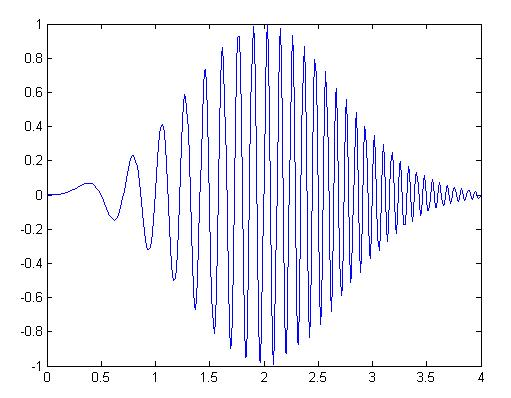

**Sample Chirplet**
</br>
Image from: https://upload.wikimedia.org/wikipedia/commons/1/1e/Chirplet.jpg




### Chirplet Transform

The Chirplet Transform of a signal $x(t)$ is often represented as:
$$
C(a, b, \omega, \tau) = \int_{-\infty}^{\infty} x(t) \psi_{a, b, \omega, \tau}^*(t) \, dt
$$
where * denotes the complex conjugate and $\psi_{a, b, \omega, \tau}(t)$ is the Chirplet defined as:
$$
\psi_{a, b, \omega, \tau}(t) = e^{j(\omega t + \frac{a}{2}t^2 + b t + \tau)}
$$

### Polynomial Chirplet Transform

The Polynomial Chirplet Transform extends the Chirplet Transform by introducing a polynomial modulation. The general form is:
$$
C(a, b, \omega, \tau, P(t)) = \int_{-\infty}^{\infty} x(t) \psi_{a, b, \omega, \tau, P(t)}^*(t) \, dt
$$
Here, $P(t)$ is a polynomial function that modulates the Chirplet parameters.
$$
\psi_{a, b, \omega, \tau, P(t)}(t) = e^{j(\omega t + \frac{a}{2}t^2 + b t + \tau + P(t))}
$$

In [ ]:
import numpy as np
from lib.dsp import chirplet_transform, scg_simulate
import matplotlib.pyplot as plt

help(chirplet_transform)

signal = scg_simulate()[:1000]
ct_matrix = chirplet_transform(signal)

plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.title("Input signal")
plt.plot(signal)
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplot(2,1,2)
plt.title("chirplet transform")
plt.xlabel("Time/s")
plt.ylabel("Frequency")
plt.imshow(ct_matrix, aspect="auto")
plt.colorbar(label="Magnitude")
plt.tight_layout()
plt.show()

## Wigner Ville Distribution (WVD)


WVD is a time-frequency representation method widely used in signal processing and analysis. The primary goal of the Wigner-Ville Distribution is to provide a representation of the instantaneous frequency distribution of a signal. Unlike traditional methods such as Fourier transform and short-time Fourier transform, the Wigner-Ville Distribution offers more detailed information in both time and frequency domains, simultaneously depicting the variations of a signal over time and frequency.

The definition of WVD is as follows:
$$
W_x(t, f) = \int_{-\infty}^{\infty} x\left(t + \frac{\tau}{2}\right) \cdot \overline{x\left(t - \frac{\tau}{2}\right)} \cdot e^{-2\pi i f \tau} \,d\tau
$$
Here, $W_x(t, f)$ represents the WVD, $x(t)$ is the input signal, $\overline{x(t)}$ denotes the complex conjugate of $x(t)$, $t$ is time, and $f$ is frequency. The WVD describes the transient characteristics of a signal by computing the autocorrelation of the signal at different time windows.

The advantages of WVD include its adaptability to non-stationary signals and its ability to capture the transient features of a signal. However, WVD also has some drawbacks, such as the presence of cross terms that may introduce additional complexity to the analysis.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lib.dsp import my_wvd, scg_simulate

help(my_wvd)

signal = scg_simulate()[:1000]
plt.title("Input signal")
plt.plot(signal)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

matrix, t, f = my_wvd(signal, show=True)

## SynchroSqueezing Transform (SST)

SST is a signal processing technique designed to analyze the time-frequency structure in non-stationary and non-linear signals. SST aims to enhance the resolution of signals in the time-frequency domain, particularly when dealing with non-linear and non-stationary conditions.


1. **Time-Frequency Localization:** SST seeks to capture the instantaneous frequency information of a signal by localizing it on the time-frequency plane. This allows for a more accurate analysis of the time and frequency characteristics of non-stationary signals.

2. **Reassignment Representation:** SST employs a technique known as reassignment representation, redistributing the signal on the time-frequency plane. This helps improve the resolution of local structures in the signal, making it easier to identify and analyze features in the time-frequency domain.

3. **Sync Reassignment:** The core idea of SST involves remapping the spectral information of the Fourier transform onto the time-frequency plane, obtaining a more refined and accurate time-frequency analysis of the signal. This sync reassessment allows for better detection of instantaneous frequency changes in the signal.


In [ ]:
from lib.dsp import sst_stft, scg_simulate
import numpy as np
import matplotlib.pyplot as plt

help(sst_stft)

fs = 100
signal = scg_simulate()[:1000]
Tx, Sx, ssq_freqs, Sfs= sst_stft(signal, window="ham", nperseg = 128, fs = fs)

plt.figure(figsize=(8,9))
plt.subplot(3,1,1)
plt.title("Input signal")
plt.plot(signal)
plt.xlabel("Time")
plt.ylabel("Amplitude")


plt.subplot(3,1,2)
plt.title("STFT of Input signal")
plt.imshow(np.abs(Sx), aspect="auto")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(label="Magnitude")
plt.subplot(3,1,3)
plt.title("Synchrosqueezed STFT of Input signal")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.imshow(np.abs(Tx), aspect="auto")
plt.colorbar(label="Magnitude")
plt.tight_layout()
plt.show()

In [ ]:
from lib.dsp import sst_cwt, scg_simulate
import numpy as np
import matplotlib.pyplot as plt

help(sst_cwt)

fs = 100
signal = scg_simulate()[:1000]
Tx, Wx, ssq_freqs, scale= sst_cwt(signal, wavelet="morlet", scales="log", nv=20, fs = fs,gamma = 3e-7)

plt.figure(figsize=(8,9))
plt.subplot(3,1,1)
plt.title("Input signal")
plt.plot(signal)
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplot(3,1,2)
plt.imshow(np.abs(Wx), aspect='auto', extent=[0, len(signal) / fs, ssq_freqs[-1], ssq_freqs[0]])
plt.colorbar(label='Magnitude')
plt.title('Continuous Wavelet Transform')
plt.xlabel('Time/s')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
plt.imshow(np.abs(Tx), aspect='auto', extent=[0, len(signal) / fs, ssq_freqs[-1], ssq_freqs[0]])
plt.colorbar(label='Magnitude')
plt.title('Synchrosqueezed Continuous Wavelet Transform')
plt.xlabel('Time/s')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()